In [1]:
from cartoGRAPHs import *
import random 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import json
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt 
import colorsys
from PIL import ImageColor
import pickle as pk

/opt/anaconda3/envs/Exposurome/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DEBUG: in init: import done


_____
# G G N / gene-gene network 
_____

In [2]:

datatable = pd.read_csv('output/final_backbone_gene_graph_significant_combo_ji_df.tsv', delimiter='\t', index_col=0)
datatable

Gene A   Gene B   alpha    weight
0             AR      MYC  0.0361  0.136959
1             AR    ABCB1  0.0148  0.119674
2             AR    CASP3  0.0013  0.102315
3             AR    CASP8  0.0292  0.100084
4             AR     AKT1  0.0150  0.106467
...          ...      ...     ...       ...
695184   MIR4791     MIR7  0.0588  1.000000
695185  MIR548BA     MIR7  0.0588  1.000000
695186    MIR553   MIR890  0.0807  1.000000
695187   MIR1301   MIR658  0.0134  1.000000
695188   MIR371B  MIR4468  0.0900  1.000000

[695189 rows x 4 columns]

In [3]:
G = nx.from_pandas_edgelist(datatable, 'Gene A', 'Gene B')
print('G nodes: ',len(G.nodes())) 
print('G edges: ',len(G.edges()))


with open('output/Communities/Infomap/gg_third_iteration_infomap.pickle', 'rb') as handle:
    first_level_infomap = pickle.load(handle)

with open('output/Communities/Infomap/gg_second_iteration_infomap.pickle', 'rb') as handle:
    second_level_infomap = pickle.load(handle)

with open('output/Communities/Infomap/gg_first_iteration_infomap.pickle', 'rb') as handle:
    third_level_infomap = pickle.load(handle)

with open('output/Communities/Infomap/gg_ji_first_infomap_iteration.pickle', 'rb') as handle:
    gg_first_level_infomap = pickle.load(handle)

with open('output/Communities/Infomap/gg_ji_second_infomap_iteration.pickle', 'rb') as handle:
    gg_second_level_infomap = pickle.load(handle)

G nodes:  22201
G edges:  695189


### calculate features based on communities 
+ #1 THIRD LEVEL COMMUNITIES 

In [7]:
gene_list=[]
for gene_l in third_level_infomap.values():
    for e in gene_l:
        gene_list.append(e)
print(len(gene_list))

22201


In [8]:
layout_method = 'third-level-infomap' 

d_comm_third = {}
for g in G.nodes():
    for k,v in third_level_infomap.items():
        if g in v:
            d_comm_third[g] = k

d_communities_third = {}
for g in G.nodes():
    intermed_list = [0]*len(third_level_infomap.keys())
    for k,v in third_level_infomap.items():
        if g in v:
            intermed_list[k-1] = 1
    d_communities_third[g] = intermed_list
d_nodefeatures_third = d_comm_third

FM_communities_third = pd.DataFrame(d_communities_third).T

print(len(third_level_infomap))
FM_communities_third

76


0   1   2   3   4   5   6   7   8   9   ...  66  67  68  69  70  71  \
AR        0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
MYC       0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
ABCB1     0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
CASP3     0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
CASP8     0   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
MIR890    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
MIR1301   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
MIR658    0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
MIR371B   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
MIR4468   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

         72  73  74  75  
AR        0   0   0   0  
MYC       0   0   0   0  
ABCB1     0   0   0   0  
CASP3     0   0   0   0  
CASP8     0   0   0   0  
...      ..  ..  ..  ..  
MIR890    0   1   0   0  
MIR1301   0   0   1   0  
MIR658    0   0   1   0  
MIR371B   0   0   0   1  
MIR4468   0   0   0   1  

[22201 rows x 76 columns]

+ #2 SECOND LEVEL COMMUNITITES

In [9]:
layout_method = 'second-level-infomap' 

d_comm_second = {}
for g in G.nodes():
    for k,v in second_level_infomap.items():
        if g in v:
            d_comm_second[g] = k

d_communities_second = {}
for g in G.nodes():
    intermed_list = [0]*len(second_level_infomap.keys())
    for k,v in second_level_infomap.items():
        if g in v:
            intermed_list[k-1] = 1
    d_communities_second[g] = intermed_list
d_nodefeatures_second = d_comm_second

FM_communities_second = pd.DataFrame(d_communities_second).T

print(len(second_level_infomap))
FM_communities_second

479


0    1    2    3    4    5    6    7    8    9    ...  469  470  471  \
AR         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MYC        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
ABCB1      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
CASP3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
CASP8      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
MIR890     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MIR1301    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MIR658     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MIR371B    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MIR4468    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

         472  473  474  475  476  477  478  
AR         0    0    0    0    0    0    0  
MYC        0    0    0    0    0    0    0  
ABCB1      0    0    0    0    0    0    0  
CASP3      0    0    0    0    0    0    0  
CASP8      0    0    0    0    0    0    0  
...      ...  ...  ...  ...  ...  ...  ...  
MIR890     0    0    0    0    1    0    0  
MIR1301    0    0    0    0    0    1    0  
MIR658     0    0    0    0    0    1    0  
MIR371B    0    0    0    0    0    0    1  
MIR4468    0    0    0    0    0    0    1  

[22201 rows x 479 columns]

+ #3 FIRST LEVEL COMMUNITIES

In [10]:
layout_method = 'first-level-infomap' 

d_comm_first = {}
for g in G.nodes():
    for k,v in first_level_infomap.items():
        if g in v:
            d_comm_first[g] = k

d_communities_first = {}
for g in G.nodes():
    intermed_list = [0]*len(first_level_infomap.keys())
    for k,v in first_level_infomap.items():
        if g in v:
            intermed_list[k-1] = 1
    d_communities_first[g] = intermed_list
d_nodefeatures_first = d_comm_first

FM_communities_first = pd.DataFrame(d_communities_first).T

print(len(first_level_infomap))
FM_communities_first

485


0    1    2    3    4    5    6    7    8    9    ...  475  476  477  \
AR         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MYC        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
ABCB1      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
CASP3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
CASP8      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
MIR890     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MIR1301    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MIR658     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MIR371B    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
MIR4468    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

         478  479  480  481  482  483  484  
AR         0    0    0    0    0    0    0  
MYC        0    0    0    0    0    0    0  
ABCB1      0    0    0    0    0    0    0  
CASP3      0    0    0    0    0    0    0  
CASP8      0    0    0    0    0    0    0  
...      ...  ...  ...  ...  ...  ...  ...  
MIR890     0    0    0    0    1    0    0  
MIR1301    0    0    0    0    0    1    0  
MIR658     0    0    0    0    0    1    0  
MIR371B    0    0    0    0    0    0    1  
MIR4468    0    0    0    0    0    0    1  

[22201 rows x 485 columns]

In [11]:
r = 0.9
alpha = 1.0

A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
DM_m = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
FM_structural = pd.DataFrame(DM_m)
FM_structural.sum(axis=1) # axis=1 for columns i.e. features = sum 1
FM_structural.index=list(G.nodes())
FM_structural.columns=list(G.nodes())
FM_structural

AR       MYC     ABCB1     CASP3     CASP8      AKT1     HIF1A  \
AR       0.900089  0.000666  0.001096  0.001366  0.000946  0.000966  0.000711   
MYC      0.001401  0.900075  0.001106  0.001378  0.000970  0.000992  0.000745   
ABCB1    0.001403  0.000673  0.900096  0.001377  0.000955  0.000975  0.000718   
CASP3    0.001387  0.000665  0.001092  0.900074  0.000948  0.000968  0.000714   
CASP8    0.001391  0.000678  0.001097  0.001375  0.900071  0.000985  0.000728   
...           ...       ...       ...       ...       ...       ...       ...   
MIR890   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MIR1301  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MIR658   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MIR371B  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MIR4468  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            MAPK1     MAPK3     MAPK8  ...  MIR3529  MIR4791  MIR548BA  MIR7  \
AR       0.001068  0.001044  0.000754  ...      0.0      0.0       0.0   0.0   
MYC      0.001086  0.001063  0.000784  ...      0.0      0.0       0.0   0.0   
ABCB1    0.001078  0.001055  0.000761  ...      0.0      0.0       0.0   0.0   
CASP3    0.001069  0.001045  0.000754  ...      0.0      0.0       0.0   0.0   
CASP8    0.001079  0.001056  0.000769  ...      0.0      0.0       0.0   0.0   
...           ...       ...       ...  ...      ...      ...       ...   ...   
MIR890   0.000000  0.000000  0.000000  ...      0.0      0.0       0.0   0.0   
MIR1301  0.000000  0.000000  0.000000  ...      0.0      0.0       0.0   0.0   
MIR658   0.000000  0.000000  0.000000  ...      0.0      0.0       0.0   0.0   
MIR371B  0.000000  0.000000  0.000000  ...      0.0      0.0       0.0   0.0   
MIR4468  0.000000  0.000000  0.000000  ...      0.0      0.0       0.0   0.0   

           MIR553    MIR890   MIR1301    MIR658   MIR371B   MIR4468  
AR       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
MYC      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
ABCB1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
CASP3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
CASP8    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...           ...       ...       ...       ...       ...       ...  
MIR890   0.090909  0.909091  0.000000  0.000000  0.000000  0.000000  
MIR1301  0.000000  0.000000  0.909091  0.090909  0.000000  0.000000  
MIR658   0.000000  0.000000  0.090909  0.909091  0.000000  0.000000  
MIR371B  0.000000  0.000000  0.000000  0.000000  0.909091  0.090909  
MIR4468  0.000000  0.000000  0.000000  0.000000  0.090909  0.909091  

[22201 rows x 22201 columns]

___ 
# 1 VIS 1 - Visualizing 1 selected community of each level
___

## Complete GGN network - Vis

In [12]:
########################################
# select which level :
########################################

layoutname = 'thirdlevel'
x_level_infomap = third_level_infomap
d_comm = d_comm_third
FM_communities = FM_communities_third

# set visualization parameters (i.e. colors for communities, node size, features.. )
colorlist_verybright = ['#FF355E','#FF6037','#FF9933',
               '#FFCC33', '#FFFF66', '#CCFF00','#A7F432',
                '#AAF0D1', '#50BFE6', '#FF6EFF',
                '#FF00CC', 
]
colorlist_fin = colorlist_verybright * (len(x_level_infomap.keys())//len(colorlist_verybright))

# try to get unique colors for each community instead of hardcoded colors 
colorlist_fin_rgb = sns.color_palette("gist_rainbow", n_colors = len(x_level_infomap.keys()))
colorlist_fin = [mcolors.to_hex(rgb) for rgb in colorlist_fin_rgb]
random.shuffle(colorlist_fin)
print("number of unique colors:" ,len(set(colorlist_fin)))

# assign random color to each community
d_comm_col = dict(zip(x_level_infomap.keys(), colorlist_fin))

# match community colors assigned to nodes-community assignment
d_nodecolors_hex = {} 
for node,comm in d_comm.items():
    for com,col in d_comm_col.items():
        if comm == com:
            d_nodecolors_hex[node] = col 

opacity_nodes = 0.9
node_edge_col = '#000000' 
node_linewidth = 0.25

edge_opacity = 0.25
edge_width = 0.1
edge_color = '#A1A1A1'

# get all subgraphs of all communities : 
nodes_allcommunities = []
subgraphs_allcommunities = []

for number_of_community in range(min(d_comm.values()),max(d_comm.values())+1):

    nodes_comm0 = []
    for node, comm in d_comm.items(): 
        if comm == number_of_community:
            nodes_comm0.append(node)
            G_comm0 = G.subgraph(nodes_comm0)

    nodes_allcommunities.append(nodes_comm0)
    subgraphs_allcommunities.append(G_comm0)

number of unique colors: 76


### FEATURE MODULATED LAYOUT 
structural (global) with functional (communities)

In [13]:
scalar_val = 0.35
layout_method = 'modulated-scal'+str(scalar_val)
DF_structural = FM_structural
DF_functional = FM_communities.T
DF_merge = feature_modulation(DF_structural,DF_functional, scalar_val)

n_n = 12
spr = 1.0
md = 0.9
metr2D = 'cosine'

posG2D_modulated = layout_portrait_umap(G,
                                   DF_structural,
                                   2,
                                   n_neighbors=n_n, 
                                   spread=spr, 
                                   min_dist=md, 
                                   metric=metr2D
                                  )

posG2D_new = posG2D_modulated

/Users/lsd/anaconda3/envs/Exposurome/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [14]:
posG3D_modulated = layout_portrait_umap(G,
                                   DF_structural,
                                   3,
                                   n_neighbors=n_n, 
                                   spread=spr, 
                                   min_dist=md, 
                                   metric=metr2D
                                  )

posG3D_new = posG3D_modulated

/Users/lsd/anaconda3/envs/Exposurome/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [15]:
exposurome_3dpos=[]
exposurome_col=[]
exposurome_col_dict={}
for exp,pos in posG3D_new.items():
    exposurome_3dpos.append(pos)
    for i,n_comm in enumerate(nodes_allcommunities):
        if exp in n_comm:
            exposurome_col.append(d_comm_col[i+1])
            exposurome_col_dict[exp]=d_comm_col[i+1]


In [17]:

with open('output/gg_ji_exposurome_col_dict_infomap.pickle', 'wb') as handle:
    pickle.dump(exposurome_col_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [18]:

np.savetxt("output/VR/gg_Exposuromepos3d_infomap.csv", 
           exposurome_3dpos,
           delimiter =",", 
           fmt ='% s')

In [19]:
exposurome_col_rgb=[]
for hexcol in exposurome_col:
    rgb=list(ImageColor.getcolor(hexcol, "RGB"))
    rgb.append(100)
    exposurome_col_rgb.append(rgb)

In [20]:
np.savetxt("output/VR/gg_Exposuromecol_infomap.csv", 
           exposurome_col_rgb,
           delimiter =",", 
           fmt ='% s')

In [21]:
#I need to relabel the nodes to indexes
exposurome_map={}
exp_id_list=[]
c=0
for exp_node in posG3D_new.keys():
    exposurome_map[exp_node]=c
    exp_id_list.append(exp_node)
    c=c+1

In [23]:
#Let's change the names of these communities based on their size

#BROADEST==third
third_level_infomap_sort=dict(sorted(third_level_infomap.items(), key=lambda item: len(item[1]), reverse = True))
third_renamed_third_conversion_dict={}
renamed_third_level_infomap_sort={}
c=1
for com,explist in third_level_infomap_sort.items():
    renamed_third_level_infomap_sort[str(c)]=explist
    third_renamed_third_conversion_dict[com]=str(c)
    c=c+1
    
#MIDDLE==second

second_renamed_second_conversion_dict={}
renamed_second_level_infomap_sort={}

for br_com,mid_com in gg_second_level_infomap.items():
    if len(mid_com)==1:
        newcom=third_renamed_third_conversion_dict[br_com]
        renamed_second_level_infomap_sort[newcom]=second_level_infomap[mid_com[0]]
        second_renamed_second_conversion_dict[mid_com[0]]=newcom
    else:
        sorted_list=list(sorted(mid_com, key=lambda item: len(second_level_infomap[item]), reverse = True))
        for i in range(len(sorted_list)):
            q=i+1
            newcom=third_renamed_third_conversion_dict[br_com]+"_"+str(q)
            renamed_second_level_infomap_sort[newcom]=second_level_infomap[sorted_list[i]]
            second_renamed_second_conversion_dict[sorted_list[i]]=newcom
        
#FINEST==first  

first_renamed_first_conversion_dict={}
renamed_first_level_infomap_sort={}

for mid_com,fin_com in gg_first_level_infomap.items():
    if len(fin_com)==1:
        newcom=second_renamed_second_conversion_dict[mid_com]
        renamed_first_level_infomap_sort[newcom]=first_level_infomap[fin_com[0]]
        first_renamed_first_conversion_dict[fin_com[0]]=newcom
    else:
        sorted_list=list(sorted(fin_com, key=lambda item: len(first_level_infomap[item]), reverse = True))
        for i in range(len(sorted_list)):
            q=i+1
            newcom=second_renamed_second_conversion_dict[mid_com]+"_"+str(q)
            renamed_first_level_infomap_sort[newcom]=first_level_infomap[sorted_list[i]]
            first_renamed_first_conversion_dict[sorted_list[i]]=newcom
        

In [24]:
third_renamed_third_conversion_dict_rev={}
for k,v in third_renamed_third_conversion_dict.items():
    third_renamed_third_conversion_dict_rev[v]=k

second_renamed_second_conversion_dict_rev={}
for k,v in second_renamed_second_conversion_dict.items():
    second_renamed_second_conversion_dict_rev[v]=k

first_renamed_first_conversion_dict_rev={}
for k,v in first_renamed_first_conversion_dict.items():
    first_renamed_first_conversion_dict_rev[v]=k

In [25]:
tot_v=[]
for k,v in renamed_second_level_infomap_sort.items():
    tot_v.extend(v)
len(tot_v)

22201

In [26]:
tremap_color_dict={}
for com,explist in renamed_third_level_infomap_sort.items():
    col_list=[]
    for exp in explist:
        col_list.append(exposurome_col_dict[exp])
    if len(set(col_list))==1:
        tremap_color_dict[com]=col_list[0]
    else:
        print("%s is multicolor"%com)

for com,explist in renamed_second_level_infomap_sort.items():
    col_list=[]
    for exp in explist:
        col_list.append(exposurome_col_dict[exp])
    if len(set(col_list))==1:
        tremap_color_dict[com]=col_list[0]
    else:
        print("%s is multicolor"%com)
        
for com,explist in renamed_first_level_infomap_sort.items():
    col_list=[]
    for exp in explist:
        col_list.append(exposurome_col_dict[exp])
    if len(set(col_list))==1:
        tremap_color_dict[com]=col_list[0]
    else:
        print("%s is multicolor"%com)
len(tremap_color_dict)

491

In [28]:

color_list=[]
com_list=[]
value_list=[]
parent_list=[]

for com, color in tremap_color_dict.items():
    com_list.append(com)
    color_list.append(color)
    
    comgrouplist=com.split("_")
    if len(comgrouplist)==1:
        value_list.append(len(renamed_third_level_infomap_sort[com]))
        parent_list.append("")
    
    elif len(comgrouplist)==2:
        try:
            value_list.append(len(renamed_second_level_infomap_sort[com]))
            oldcom=second_renamed_second_conversion_dict_rev[com]
            for brcom,midcomlist in gg_second_level_infomap.items():
                if oldcom in midcomlist:
                    parent_list.append(third_renamed_third_conversion_dict[brcom])
        except:
            value_list.append(len(renamed_first_level_infomap_sort[com]))
            oldcom=first_renamed_first_conversion_dict_rev[com]
            for midcom,fincomlist in gg_first_level_infomap.items():
                if oldcom in fincomlist:
                    parent_list.append(second_renamed_second_conversion_dict[midcom])
            
        
    else:
        value_list.append(len(renamed_first_level_infomap_sort[com]))
        oldcom=first_renamed_first_conversion_dict_rev[com]
        for midcom,fincomlist in gg_first_level_infomap.items():
            if oldcom in fincomlist:
                parent_list.append(second_renamed_second_conversion_dict[midcom])
        

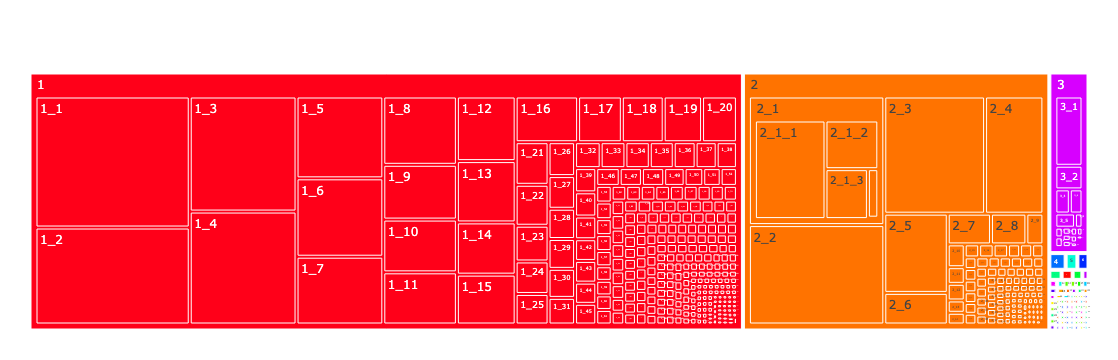

In [30]:
import plotly.graph_objects as go


fig = go.Figure(go.Treemap(
    branchvalues = "total",
    labels = com_list,
    values = value_list,
    parents = parent_list,
    marker_colors = color_list
))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.write_image('output/Figures/SF18B_v00.pdf')
fig.show()

In [31]:
#We are using the new nomenclature
fine_grained_communities_list=[]
middle_communities_list=[]
broad_communities_list=[]

for com,explist in renamed_first_level_infomap_sort.items():
    comlist=com.split("_")
    if len(comlist)==1:
        fine_grained_communities_list.append(com)
    elif len(comlist)==2:
        fine_grained_communities_list.append(com)
        middle_communities_list.append(comlist[0])
    else:
        fine_grained_communities_list.append(com)
        middle_communities_list.append(comlist[0]+"_"+comlist[1])
        broad_communities_list.append(comlist[0])

fine_grained_communities_set=set(fine_grained_communities_list)
middle_communities_set=set(middle_communities_list)
broad_communities_set=set(broad_communities_list)
print(len(broad_communities_set))  
print(len(middle_communities_set))  
print(len(fine_grained_communities_set))  

2
6
485


In [34]:
fine_grained_communities_dict={}
middle_communities_dict={}
broad_communities_dict={}

for com in fine_grained_communities_set:
    fine_grained_communities_dict[com]=renamed_first_level_infomap_sort[com]
    
for com in middle_communities_set:
    try:
        middle_communities_dict[com]=renamed_second_level_infomap_sort[com]
    except:
        middle_communities_dict[com]=renamed_third_level_infomap_sort[com]

for com in broad_communities_set:
    broad_communities_dict[com]=renamed_third_level_infomap_sort[com]
    
with open('output/Communities/Infomap/gg_ji_infomap_fine_grained_communities_dict.pickle', 'wb') as handle:
    pk.dump(fine_grained_communities_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Infomap/gg_ji_infomap_middle_communities_dict.pickle', 'wb') as handle:
    pk.dump(middle_communities_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

with open('output/Communities/Infomap/gg_ji_infomap_broad_communities_dict.pickle', 'wb') as handle:
    pk.dump(broad_communities_dict, handle, protocol=pk.HIGHEST_PROTOCOL)

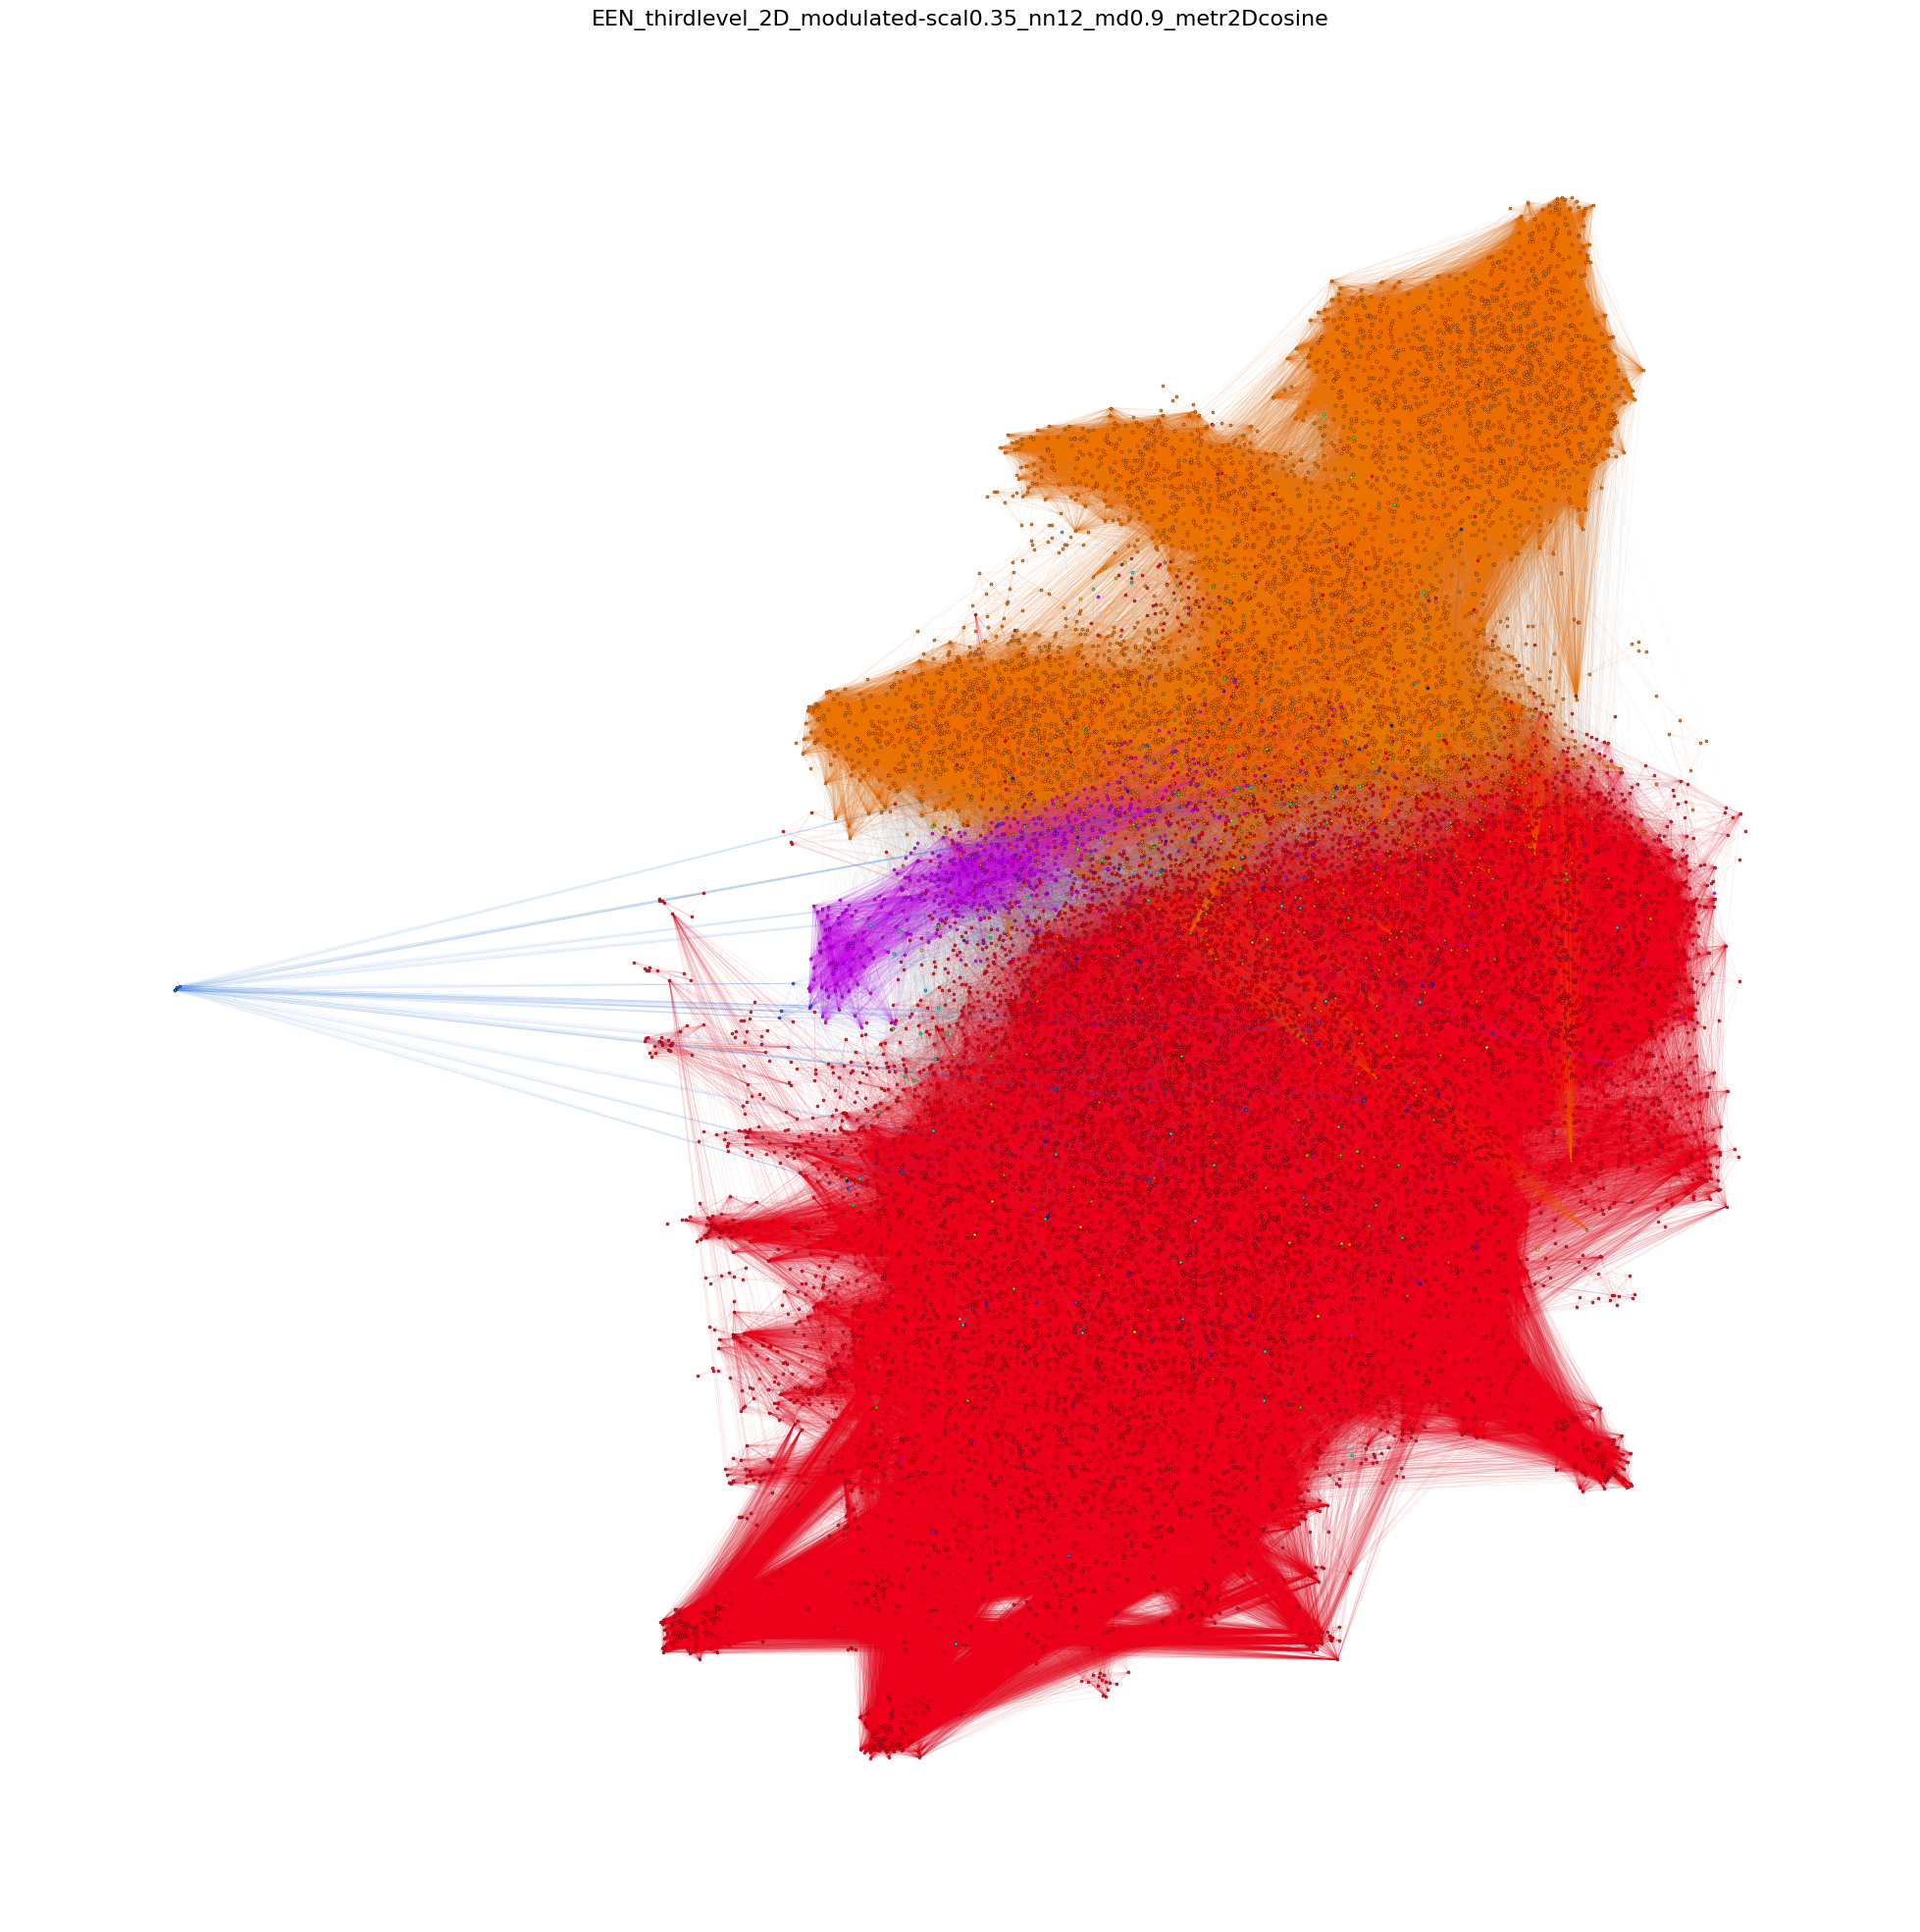

In [35]:
pos2D_allcommunities = []
colors_allcommunities = []

for number_of_community in range(min(d_comm.values())-1,max(d_comm.values())):
    for i,n_comm in enumerate(nodes_allcommunities):
        pos_comm = []
        if i == number_of_community:
            # get positions from community nodes 
            posG2D_comm0 = {}
            for k,v in posG2D_new.items():
                if k in n_comm:
                    posG2D_comm0[k] = v 
        pos_comm.append(posG2D_comm0)

        # get color from community  
        for comm, col in d_comm_col.items():
            if comm-1 == number_of_community:
                comm0_color = col

    pos2D_allcommunities.append(pos_comm)
    colors_allcommunities.append(comm0_color)

fname = 'EEN_'+layoutname+'_2D_'+layout_method+'_nn'+str(n_n)+'_md'+str(md)+'_metr2D'+metr2D
plt.figure(figsize=(25,25))
plt.title(fname, size=16)

# FIRST: draw network edges all (very transparent)
nx.draw_networkx_edges(G,posG2D_new, width = 0.1, edge_color = '#6C6C6C', alpha = 0.1)

# SECOND: draw network edges within communities 
for i in range(len(subgraphs_allcommunities)):
    nx.draw_networkx_nodes(subgraphs_allcommunities[i],dict(*pos2D_allcommunities[i]), edgecolors = node_edge_col, linewidths = node_linewidth, node_color = colors_allcommunities[i], node_size = 5, alpha = opacity_nodes)
    nx.draw_networkx_edges(subgraphs_allcommunities[i],dict(*pos2D_allcommunities[i]), width = 0.5, edge_color = colors_allcommunities[i], alpha = 0.075)

plt.box(False)
plt.savefig('output/Figures/SF18A_part1_v00.pdf',dpi=300)

plt.show()

In [39]:
pos2D_allcommunities = []
colors_allcommunities = []

for number_of_community in range(min(d_comm.values()),max(d_comm.values())+1):
    for i,n_comm in enumerate(nodes_allcommunities):
        pos_comm = []
        if i == number_of_community:
            # get positions from community nodes 
            posG2D_comm0 = {}
            for k,v in posG2D_new.items():
                if k in n_comm:
                    posG2D_comm0[k] = v 
        pos_comm.append(posG2D_comm0)

        # get color from community  
        for comm, col in d_comm_col.items():
            if comm == number_of_community:
                comm0_color = col

    pos2D_allcommunities.append(pos_comm)
    colors_allcommunities.append(comm0_color)

In [37]:
for com, genelist in fine_grained_communities_dict.items():
    if 'AKAP3' in genelist:
        print(com)
    

1_94


In [38]:
fine_grained_communities_dict['1_94']

['AKAP3',
 'CXADRP3',
 'FBXO47',
 'KRTAP19-7',
 'LINC00159',
 'LINC02325',
 'MYO1H',
 'RSU1P2',
 'TTTY18',
 'GADL1',
 'APOBEC4',
 'NME9']

In [51]:
for com, genelist in fine_grained_communities_dict.items():
    if 'OR3A2' in genelist:
        print(com)
    

1_66


In [52]:
fine_grained_communities_dict['1_66']

['OR51I1',
 'KRTAP27-1',
 'SLC9C2',
 'TOP1P1',
 'OR1E2',
 'OR1J2',
 'OR2M4',
 'OR3A2',
 'OR4D2',
 'OR51M1',
 'OR6B1',
 'OR6W1P',
 'OR7C1',
 'TAS2R13',
 'TAS2R39',
 'TAS2R7',
 'LAMB4',
 'OR7C2',
 'LINC01591']

# Specific Communities per Level - Vis

### THIRD LEVEL

Number of exposures in community: 0
Specific Graph: Graph with 14956 nodes and 454976 edges


/Users/lsd/anaconda3/envs/Exposurome/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Number of Nodes: (to match G_sub_third nodes):  14956
communities of second level in third level community selected:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

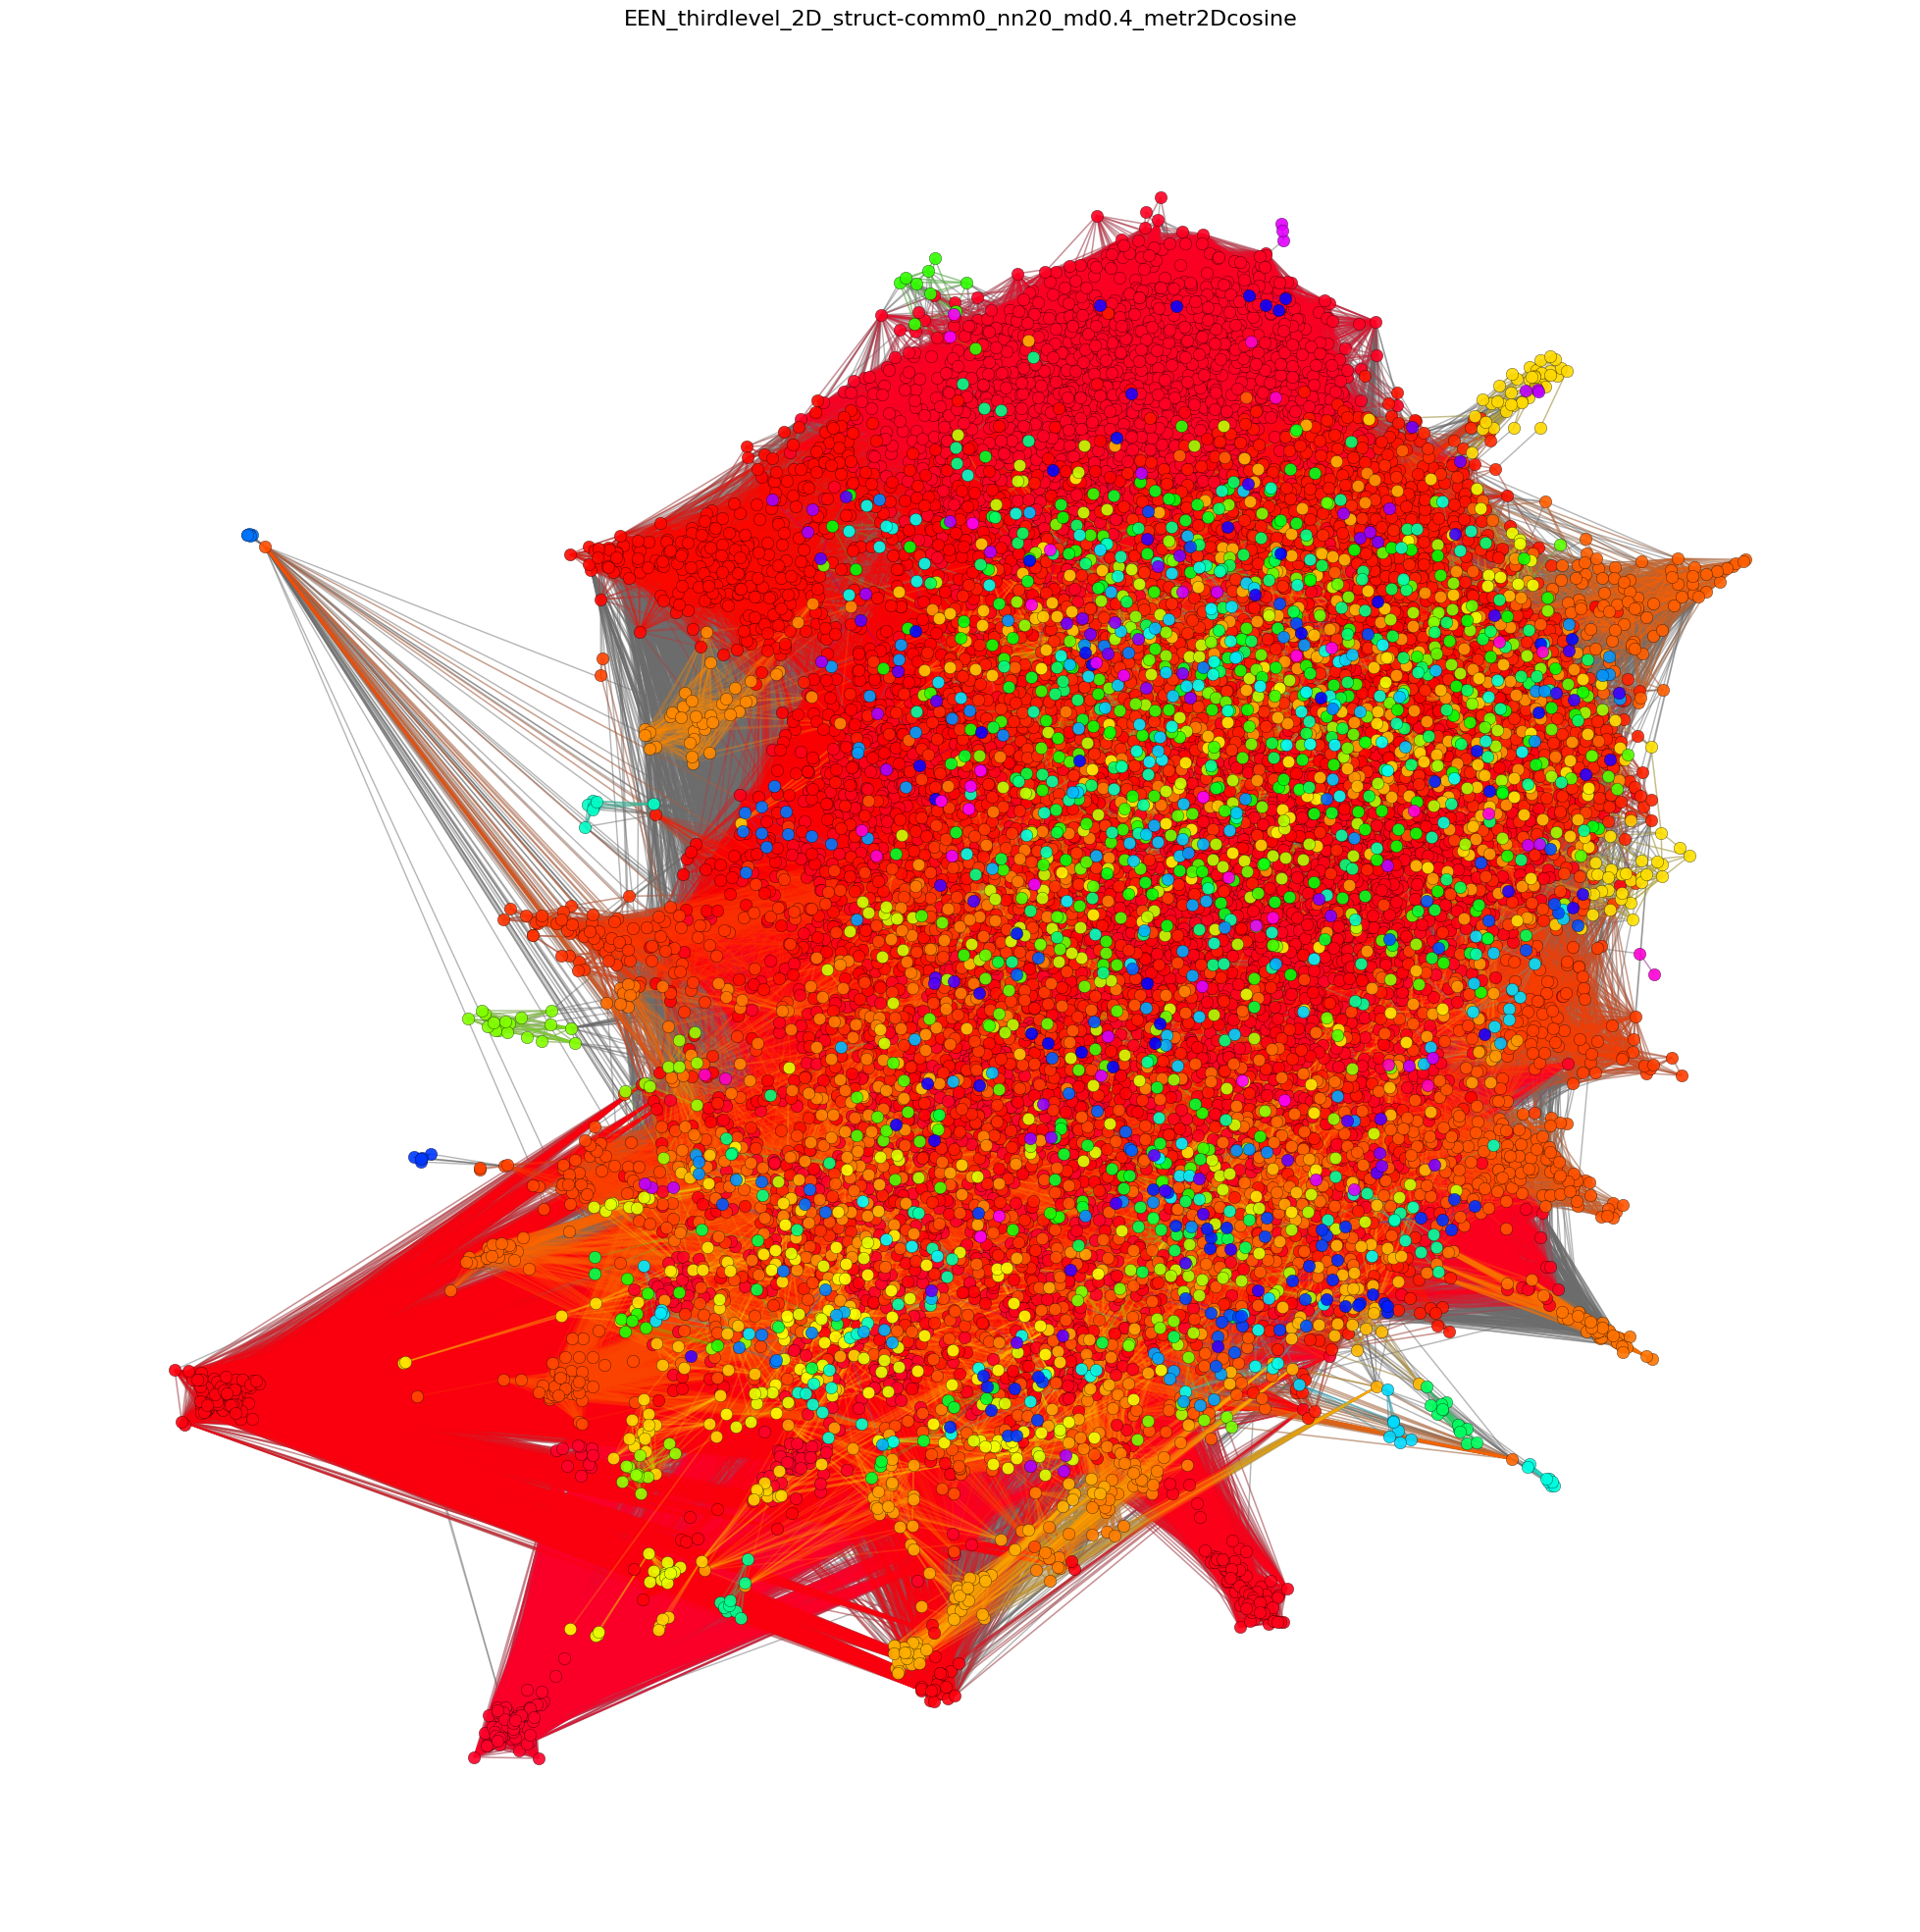

In [40]:
layoutname = 'thirdlevel'

##########################################################
spec_comm_third = 0 #Salvo's selection 1
##########################################################

sublist_third = []
for k,v in d_comm_third.items():
    if v == spec_comm_third:
        sublist_third.append(k)

d_selectedcommunity_thirdlevel = {spec_comm_third:sublist_third}
print("Number of exposures in community:" , len(*d_selectedcommunity_thirdlevel.values()))
###########################################################

# get all subgraphs of all communities : 
nodes_subcommunities = []
subgraphs_subcommunities = []

for number_of_community in range(min(d_comm_third.values()),max(d_comm_third.values())):
    nodes_comm0 = []
    for node, comm in d_comm_third.items(): 
        if comm == number_of_community:
            nodes_comm0.append(node)
            G_comm0 = G.subgraph(nodes_comm0)

    nodes_subcommunities.append(nodes_comm0)
    subgraphs_subcommunities.append(G_comm0)
    
G_sub_third = subgraphs_subcommunities[spec_comm_third]
print("Specific Graph:" , G_sub_third)


########################################
# LAYOUT 
########################################

layout_method = 'struct-comm'+str(spec_comm_third) 

r = 0.9
alpha = 1.0

A_sub = nx.adjacency_matrix(G_sub_third, nodelist=list(G_sub_third.nodes()))
DM_m_sub = rnd_walk_matrix2(A_sub, r, alpha, len(G_sub_third.nodes()))
FM_structural_sub = pd.DataFrame(DM_m_sub)
FM_structural_sub.sum(axis=1) # axis=1 for columns i.e. features = sum 1
FM_structural_sub.index=list(G_sub_third.nodes())
FM_structural_sub.columns=list(G_sub_third.nodes())

n_n = 20
spr = 0.6
md = 0.4
metr2D = 'cosine'
posG2D_third = layout_portrait_umap(G_sub_third,
                                   FM_structural_sub, #FM_communities_sub, #df_posG,
                                   2,
                                   n_neighbors=n_n, 
                                   spread=spr, 
                                   min_dist=md, 
                                   metric=metr2D
                                  )

print('Number of Nodes: (to match G_sub_third nodes): ', len(posG2D_third))



########################################
# COLORS 
########################################

# get all nodes of 3rd level subgraph - and their second level assigned communities
d_comm_second_selected = {}
for node in G_sub_third.nodes():
    if node in d_comm_second.keys():    
        d_comm_second_selected[node] = d_comm_second[node]
print("communities of second level in third level community selected: ", set(d_comm_second_selected.values()))

set_communities = set(d_comm_second_selected.values())

# get unique color for each community 
colorlist_fin_rgb = sns.color_palette("gist_rainbow", n_colors = len(set_communities))
colorlist_fin = [mcolors.to_hex(rgb) for rgb in colorlist_fin_rgb]
#random.shuffle(colorlist_fin)
print("number of unique colors:" ,len(set(colorlist_fin)))

# assign random color to each community
d_comm_col = dict(zip(set_communities , colorlist_fin))

opacity_nodes = 0.9
node_edge_col = '#000000' 
node_linewidth = 0.25
edge_opacity = 0.25
edge_width = 0.1
edge_color = '#A1A1A1'



########################################
# subsets according to sublevel communities 
########################################

# get all subgraphs of all communities : 
nodes_allcommunities_secondlevel = []
subgraphs_allcommunities_secondlevel = []

for number_of_community in list(set_communities):
    nodes_comm = []
    for node, comm in d_comm_second.items(): 
        if comm == number_of_community:
            nodes_comm.append(node)
            G_comm = G_sub_third.subgraph(nodes_comm)

    nodes_allcommunities_secondlevel.append(nodes_comm)
    subgraphs_allcommunities_secondlevel.append(G_comm)
print("Number of subgraphs:", len(subgraphs_allcommunities_secondlevel))
print("Number of second level communities: ", len(nodes_allcommunities_secondlevel))

# get sub of positions according to communities in more detailed level 
pos2D_allcommunities_secondlevel = []

for idx,number_of_community in enumerate(list(set_communities)):
    for i,n_comm in enumerate(nodes_allcommunities_secondlevel):
        pos_comm = []
        if i == idx:
            # get positions from community nodes
            posG2D_comm = {}
            for k,v in posG2D_third.items():
                if k in n_comm:
                    posG2D_comm[k] = v 
        pos_comm.append(posG2D_comm)

    pos2D_allcommunities_secondlevel.append(pos_comm)
print("Number of position-sublists:", len(pos2D_allcommunities_secondlevel))

colors_allcommunities_secondlevel = []

for idx,number_of_community in enumerate(list(set_communities)):
    for i,n_comm in enumerate(nodes_allcommunities_secondlevel):
        # get color from community  
        for comm, col in d_comm_col.items():
            if comm == number_of_community:
                comm0_color = col
    colors_allcommunities_secondlevel.append(comm0_color)

print("Number of individual colors: ", len(set(colors_allcommunities_secondlevel)))


########################################
# PLOT  
########################################

fname = 'EEN_'+layoutname+'_2D_'+layout_method+'_nn'+str(n_n)+'_md'+str(md)+'_metr2D'+metr2D
plt.figure(figsize=(25,25))
plt.title(fname, size=16)

# draw network edges all (very transparent)
nx.draw_networkx_edges(G_sub_third, posG2D_third, width = 1, edge_color = '#6C6C6C', alpha = 0.5)

# draw network edges within communities 
for i in range(len(set_communities)):
    nx.draw_networkx_nodes(subgraphs_allcommunities_secondlevel[i],
                            dict(*pos2D_allcommunities_secondlevel[i]), 
                            edgecolors = node_edge_col, 
                            linewidths = node_linewidth, 
                            node_color = colors_allcommunities_secondlevel[i], 
                            node_size = 80, alpha = opacity_nodes)
    nx.draw_networkx_edges(subgraphs_allcommunities_secondlevel[i],dict(*pos2D_allcommunities_secondlevel[i]), width = 1.25, edge_color = colors_allcommunities_secondlevel[i], alpha = 0.2)

plt.box(False)

plt.savefig('output/Figures/SF18A_part2_v00.pdf',dpi=300)
plt.show()



### FIRST LEVEL

Number of exposures in community: 12
Specific Graph: Graph with 12 nodes and 60 edges


/Users/lsd/anaconda3/envs/Exposurome/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Number of Nodes: (to match G_sub_first nodes):  12
communities of second level in third level community selected:  {82}
number of unique colors: 1
Number of subgraphs: 1
Number of second level communities:  1
Number of position-sublists: 1
Number of individual colors:  1


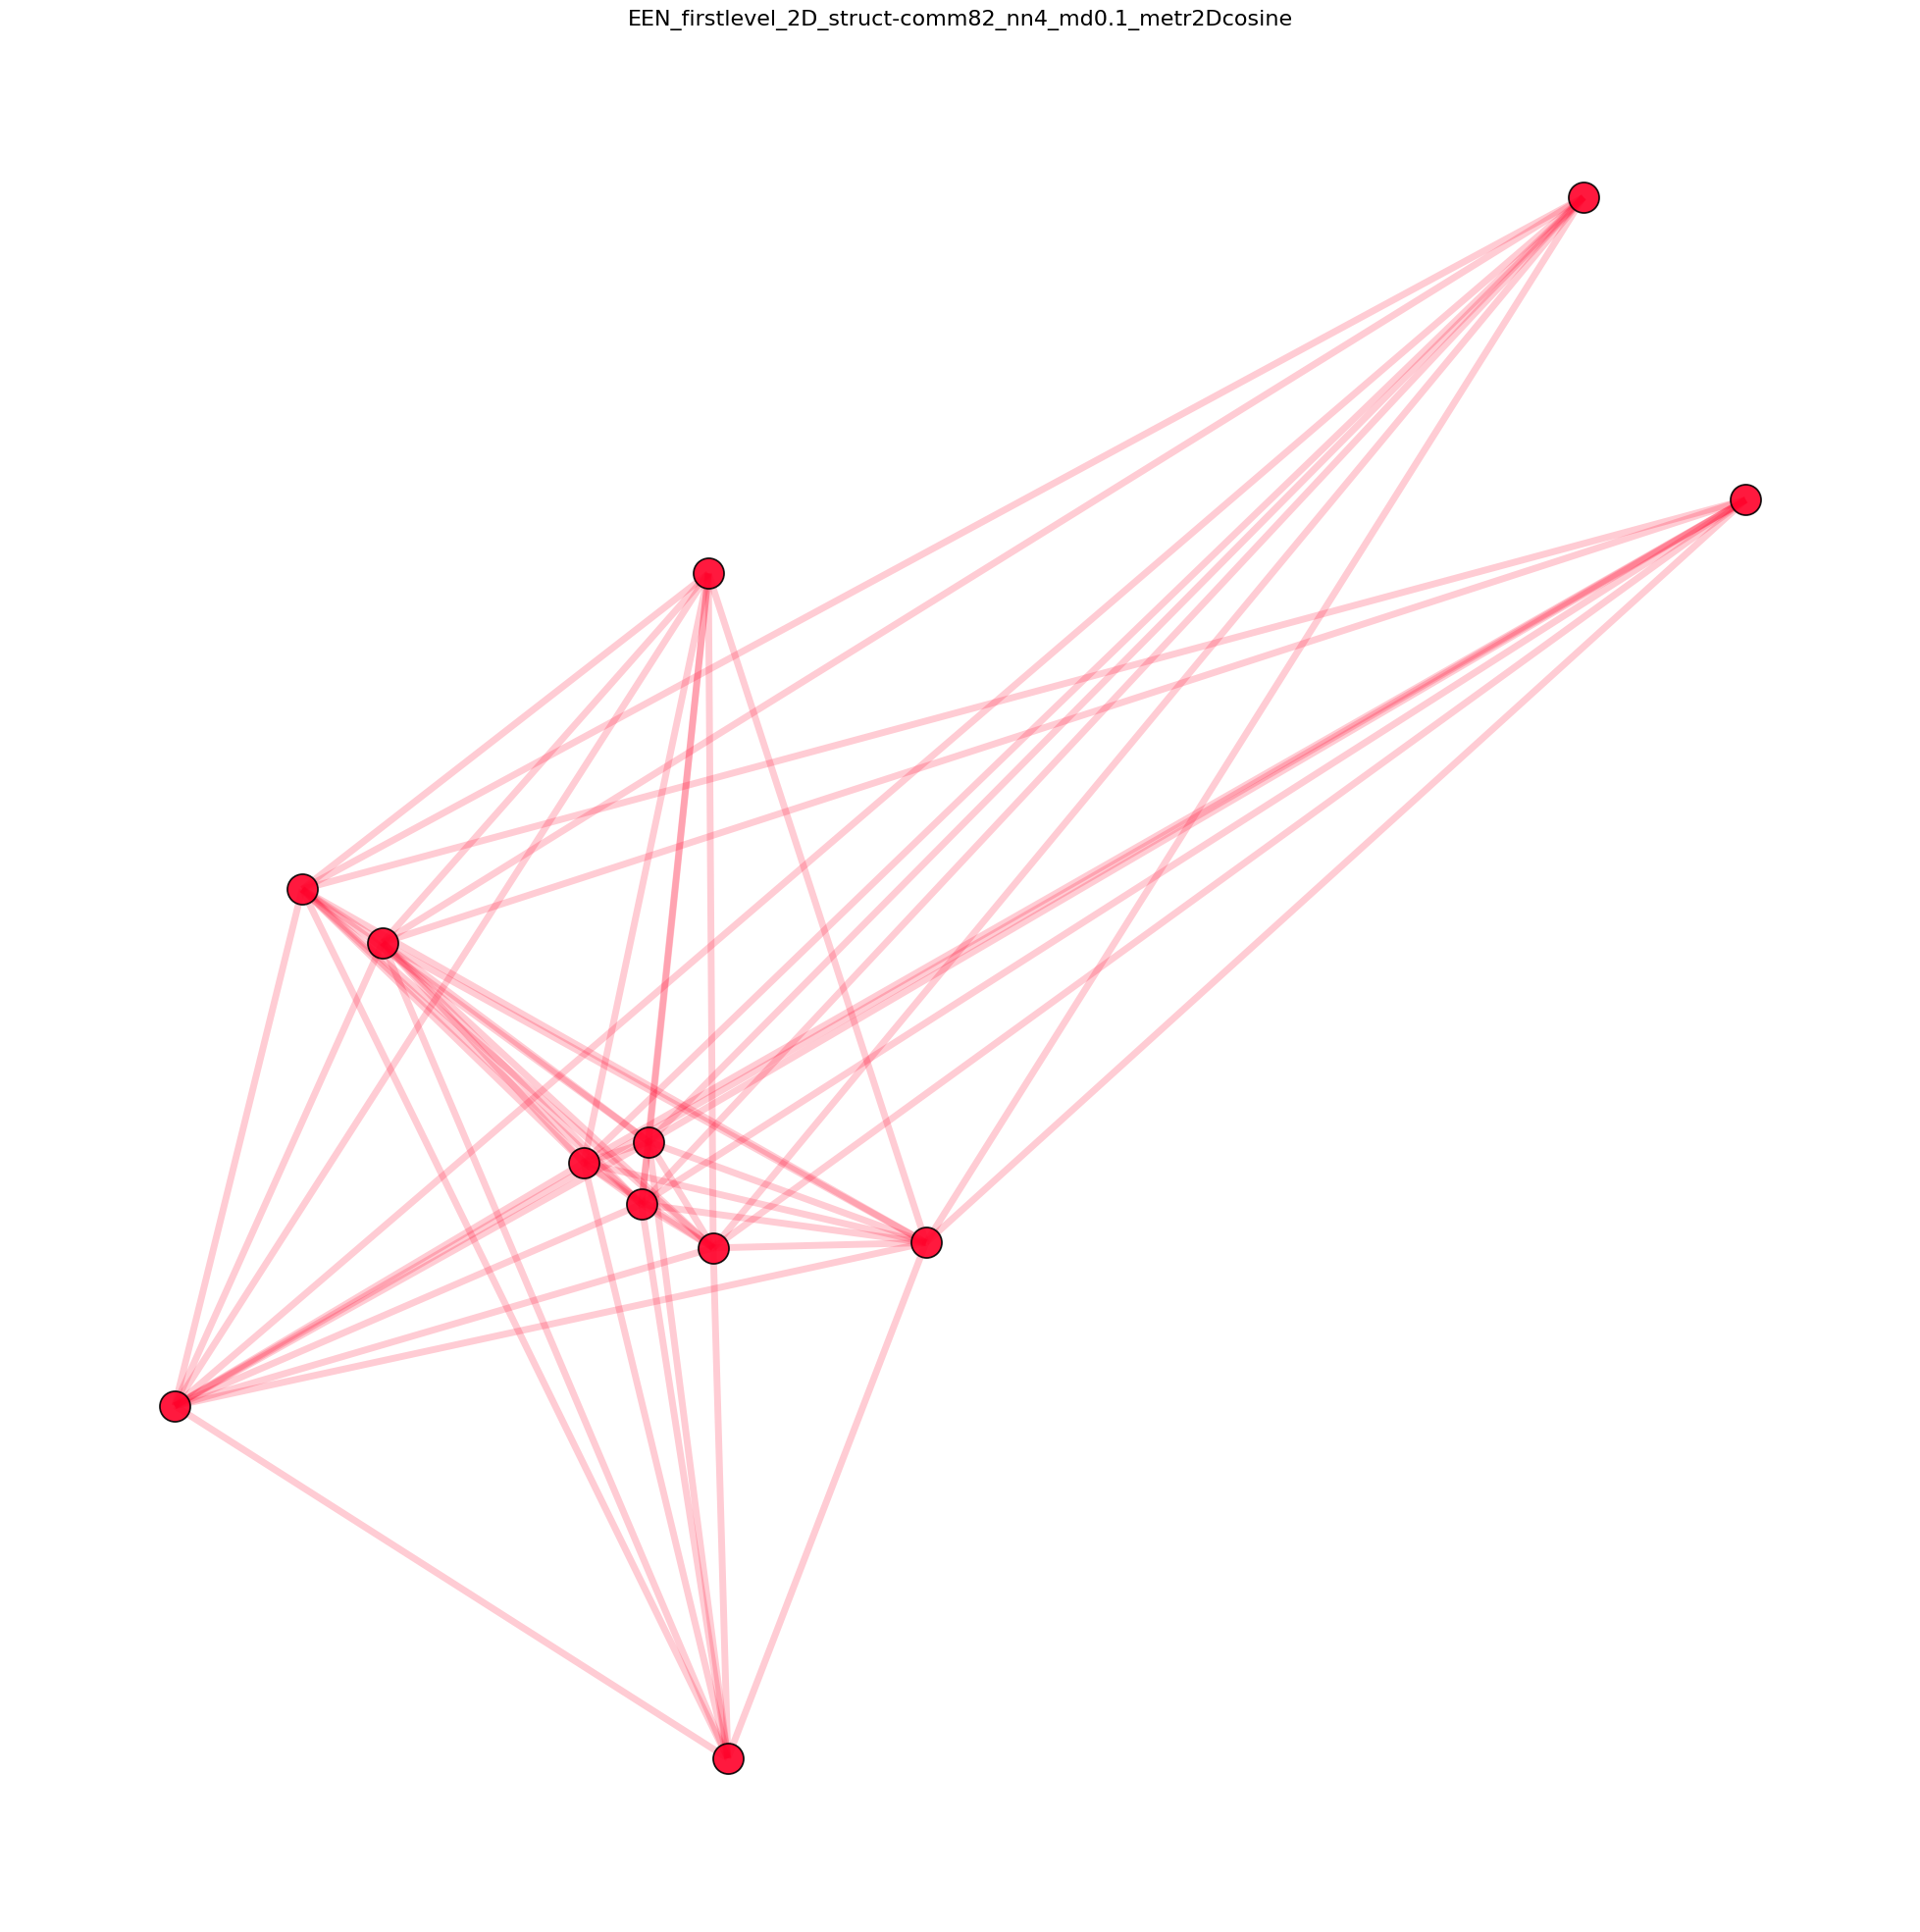

In [47]:
layoutname = 'firstlevel'

##########################################################
spec_comm_first = 82 #Salvo's selection 1_194
##########################################################

sublist_first = []
for k,v in d_comm_first.items():
    if v == spec_comm_first:
        sublist_first.append(k)

d_selectedcommunity_firstlevel = {spec_comm_first:sublist_first}
print("Number of exposures in community:" , len(*d_selectedcommunity_firstlevel.values()))
###########################################################

# get all subgraphs of all communities : 
nodes_subcommunities = []
subgraphs_subcommunities = []

for number_of_community in range(min(d_comm_first.values()),max(d_comm_first.values())):
    nodes_comm = []
    for node, comm in d_comm_first.items(): 
        if comm == number_of_community-1:
            nodes_comm.append(node)
            G_comm = G.subgraph(nodes_comm)

    nodes_subcommunities.append(nodes_comm)
    subgraphs_subcommunities.append(G_comm)
    
G_sub_first = subgraphs_subcommunities[spec_comm_first]
print("Specific Graph:" , G_sub_first)


########################################
# LAYOUT 
########################################

layout_method = 'struct-comm'+str(spec_comm_first) 

r = 0.9
alpha = 1.0

A_sub = nx.adjacency_matrix(G_sub_first, nodelist=list(G_sub_first.nodes()))
DM_m_sub = rnd_walk_matrix2(A_sub, r, alpha, len(G_sub_first.nodes()))
FM_structural_sub = pd.DataFrame(DM_m_sub)
FM_structural_sub.sum(axis=1) # axis=1 for columns i.e. features = sum 1
FM_structural_sub.index=list(G_sub_first.nodes())
FM_structural_sub.columns=list(G_sub_first.nodes())

n_n = 4
spr = 1.0
md = 0.1
metr2D = 'cosine'
posG2D_first = layout_portrait_umap(G_sub_first,
                                   FM_structural_sub, #FM_communities_sub, #df_posG,
                                   2,
                                   n_neighbors=n_n, 
                                   spread=spr, 
                                   min_dist=md, 
                                   metric=metr2D
                                  )

print('Number of Nodes: (to match G_sub_first nodes): ', len(posG2D_first))

########################################
# COLORS 
########################################

d_comm_first_selected = {}
for node in G_sub_first.nodes():
    d_comm_first_selected[node] = d_comm_first[node]
print("communities of second level in third level community selected: ", set(d_comm_first_selected.values()))

set_communities = set(d_comm_first_selected.values())

# get unique color for each community 
colorlist_fin_rgb = sns.color_palette("gist_rainbow", n_colors = len(set_communities))
colorlist_fin = [mcolors.to_hex(rgb) for rgb in colorlist_fin_rgb]
#random.shuffle(colorlist_fin)
print("number of unique colors:" ,len(set(colorlist_fin)))

# assign previously assigned color (to remain same)
d_comm_col_new = {spec_comm_first:d_comm_col[1]} # dict(zip(set_communities , colorlist_fin))

opacity_nodes = 0.9
node_edge_col = '#000000' 
node_linewidth = 0.25
edge_opacity = 0.25
edge_width = 0.1
edge_color = '#A1A1A1'


#########################################
# subsets according to sublevel communities 
########################################

# get all subgraphs of all communities : 
nodes_allcommunities_firstlevel = []
subgraphs_allcommunities_firstlevel = []

for number_of_community in list(set_communities):
    nodes_comm = []
    for node, comm in d_comm_first.items(): 
        if comm == number_of_community:
            nodes_comm.append(node)
            G_comm = G_sub_third.subgraph(nodes_comm)

    nodes_allcommunities_firstlevel.append(nodes_comm)
    subgraphs_allcommunities_firstlevel.append(G_comm)
print("Number of subgraphs:", len(subgraphs_allcommunities_firstlevel))
print("Number of second level communities: ", len(nodes_allcommunities_firstlevel))

# get sub of positions according to communities in more detailed level 
pos2D_allcommunities_firstlevel = []

for n_l in nodes_allcommunities_firstlevel:
    posG2D_comm = {}
    for n in n_l:
    # get positions from community nodes
        posG2D_comm[n] = posG2D_third[n]
    pos2D_allcommunities_firstlevel.append(posG2D_comm)
print("Number of position-sublists:", len(pos2D_allcommunities_firstlevel))

colors_allcommunities_firstlevel = []

for idx,number_of_community in enumerate(list(set_communities)):
    for i,n_comm in enumerate(nodes_allcommunities_firstlevel):
        # get color from community  
        for comm, col in d_comm_col_new.items():
            if comm == number_of_community:
                comm0_color = col
    colors_allcommunities_firstlevel.append(comm0_color)

print("Number of individual colors: ", len(set(colors_allcommunities_firstlevel)))


#######################################
# PLOT  
########################################

fname = 'EEN_'+layoutname+'_2D_'+layout_method+'_nn'+str(n_n)+'_md'+str(md)+'_metr2D'+metr2D
plt.figure(figsize=(25,25))
plt.title(fname, size=16)

# draw network edges all (very transparent)
#nx.draw_networkx_edges(G_sub_third, posG2D_third, width = 1, edge_color = '#6C6C6C', alpha = 0.1)


# draw network edges within communities 
for i in range(len(set_communities)):
    nx.draw_networkx_nodes(subgraphs_allcommunities_firstlevel[i],
                            pos2D_allcommunities_firstlevel[i], 
                            edgecolors = node_edge_col, 
                            linewidths = node_linewidth*5, 
                            node_color = colors_allcommunities_firstlevel[i], 
                            node_size = 500, alpha = opacity_nodes)
    nx.draw_networkx_edges(subgraphs_allcommunities_firstlevel[i],pos2D_allcommunities_firstlevel[i], width = 2.0*2.5, edge_color = colors_allcommunities_firstlevel[i], alpha = 0.2)

plt.box(False)

plt.savefig('output/Figures/SF18A_part3_v00.pdf',dpi=300)
plt.show()

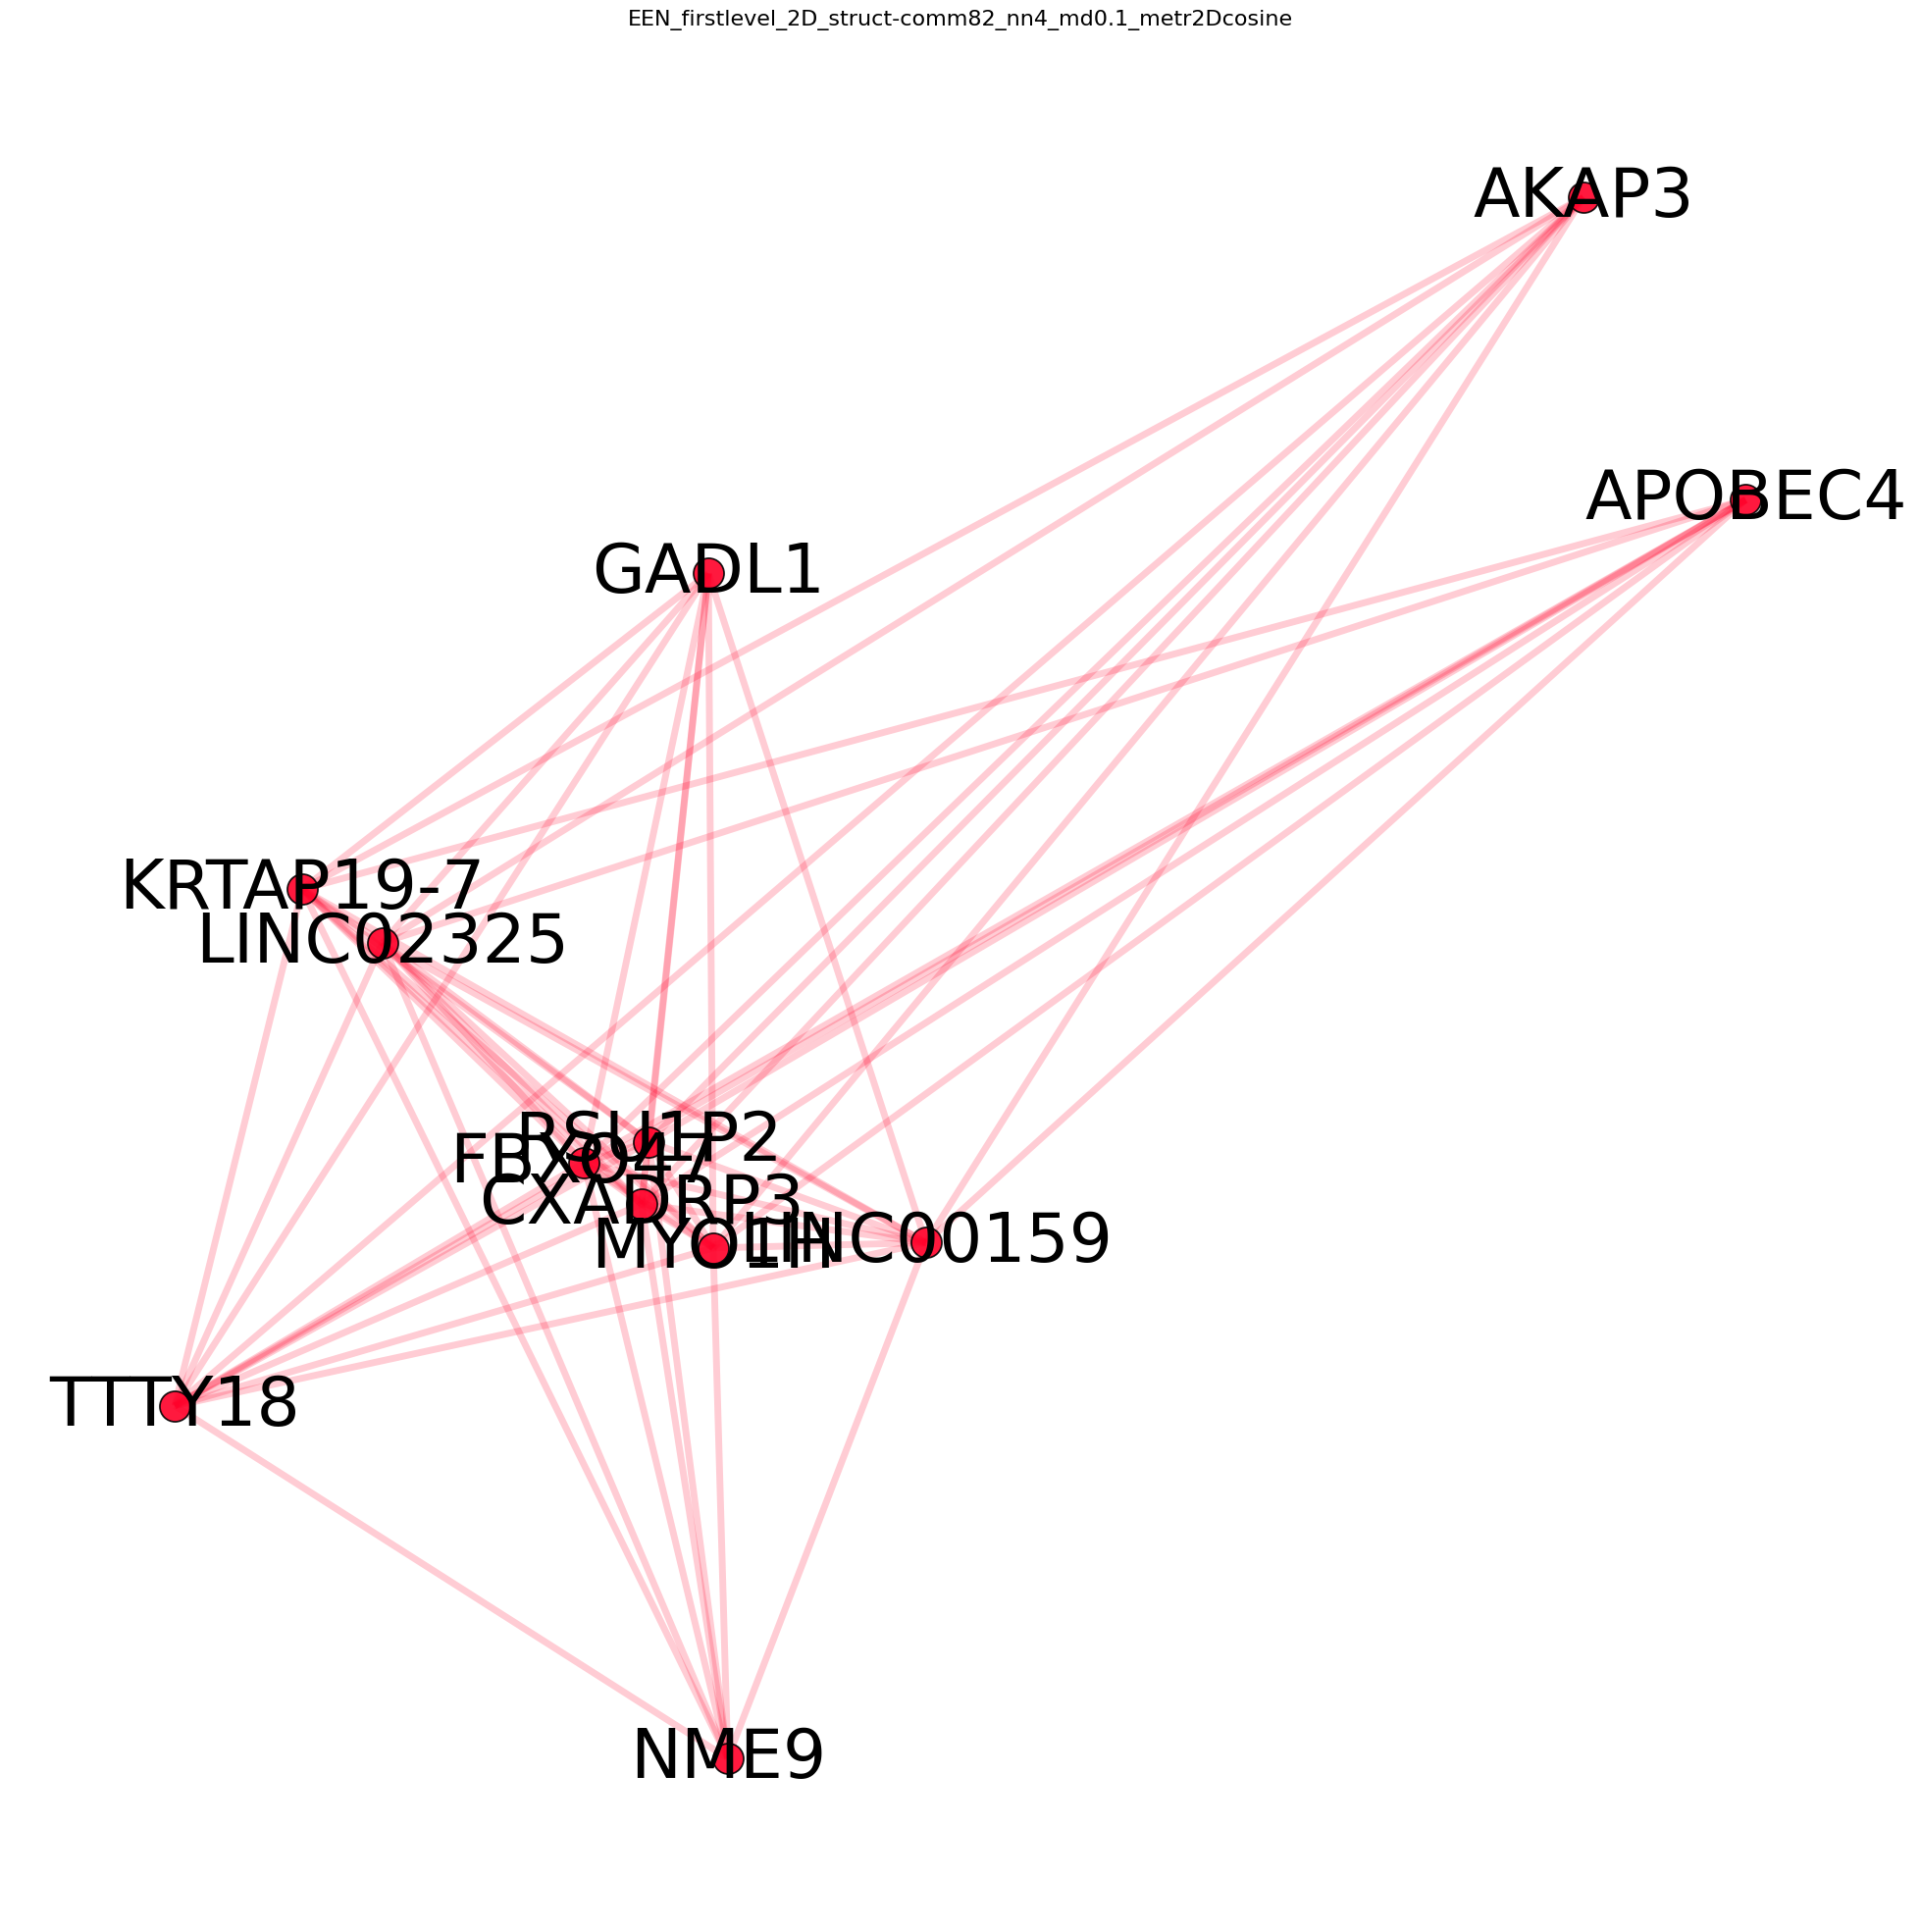

In [50]:
plt.figure(figsize=(25,25))
plt.title(fname, size=16)

# draw network edges all (very transparent)
#nx.draw_networkx_edges(G_sub_third, posG2D_third, width = 1, edge_color = '#6C6C6C', alpha = 0.1)


# draw network edges within communities 
for i in range(len(set_communities)):
    nx.draw_networkx_nodes(subgraphs_allcommunities_firstlevel[i],
                            pos2D_allcommunities_firstlevel[i], 
                            edgecolors = node_edge_col, 
                            linewidths = node_linewidth*5, 
                            node_color = colors_allcommunities_firstlevel[i], 
                            node_size = 500, alpha = opacity_nodes)
    nx.draw_networkx_edges(subgraphs_allcommunities_firstlevel[i],pos2D_allcommunities_firstlevel[i], width = 2.0*2.5, edge_color = colors_allcommunities_firstlevel[i], alpha = 0.2)
    nx.draw_networkx_labels(subgraphs_allcommunities_firstlevel[i], pos2D_allcommunities_firstlevel[i],  font_color = 'black',font_size=50)
plt.box(False)


plt.show()

Number of exposures in community: 19
Specific Graph: Graph with 19 nodes and 109 edges


/Users/lsd/anaconda3/envs/Exposurome/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Number of Nodes: (to match G_sub_first nodes):  19
communities of second level in third level community selected:  {64}
number of unique colors: 1
Number of subgraphs: 1
Number of second level communities:  1
Number of position-sublists: 1
Number of individual colors:  1


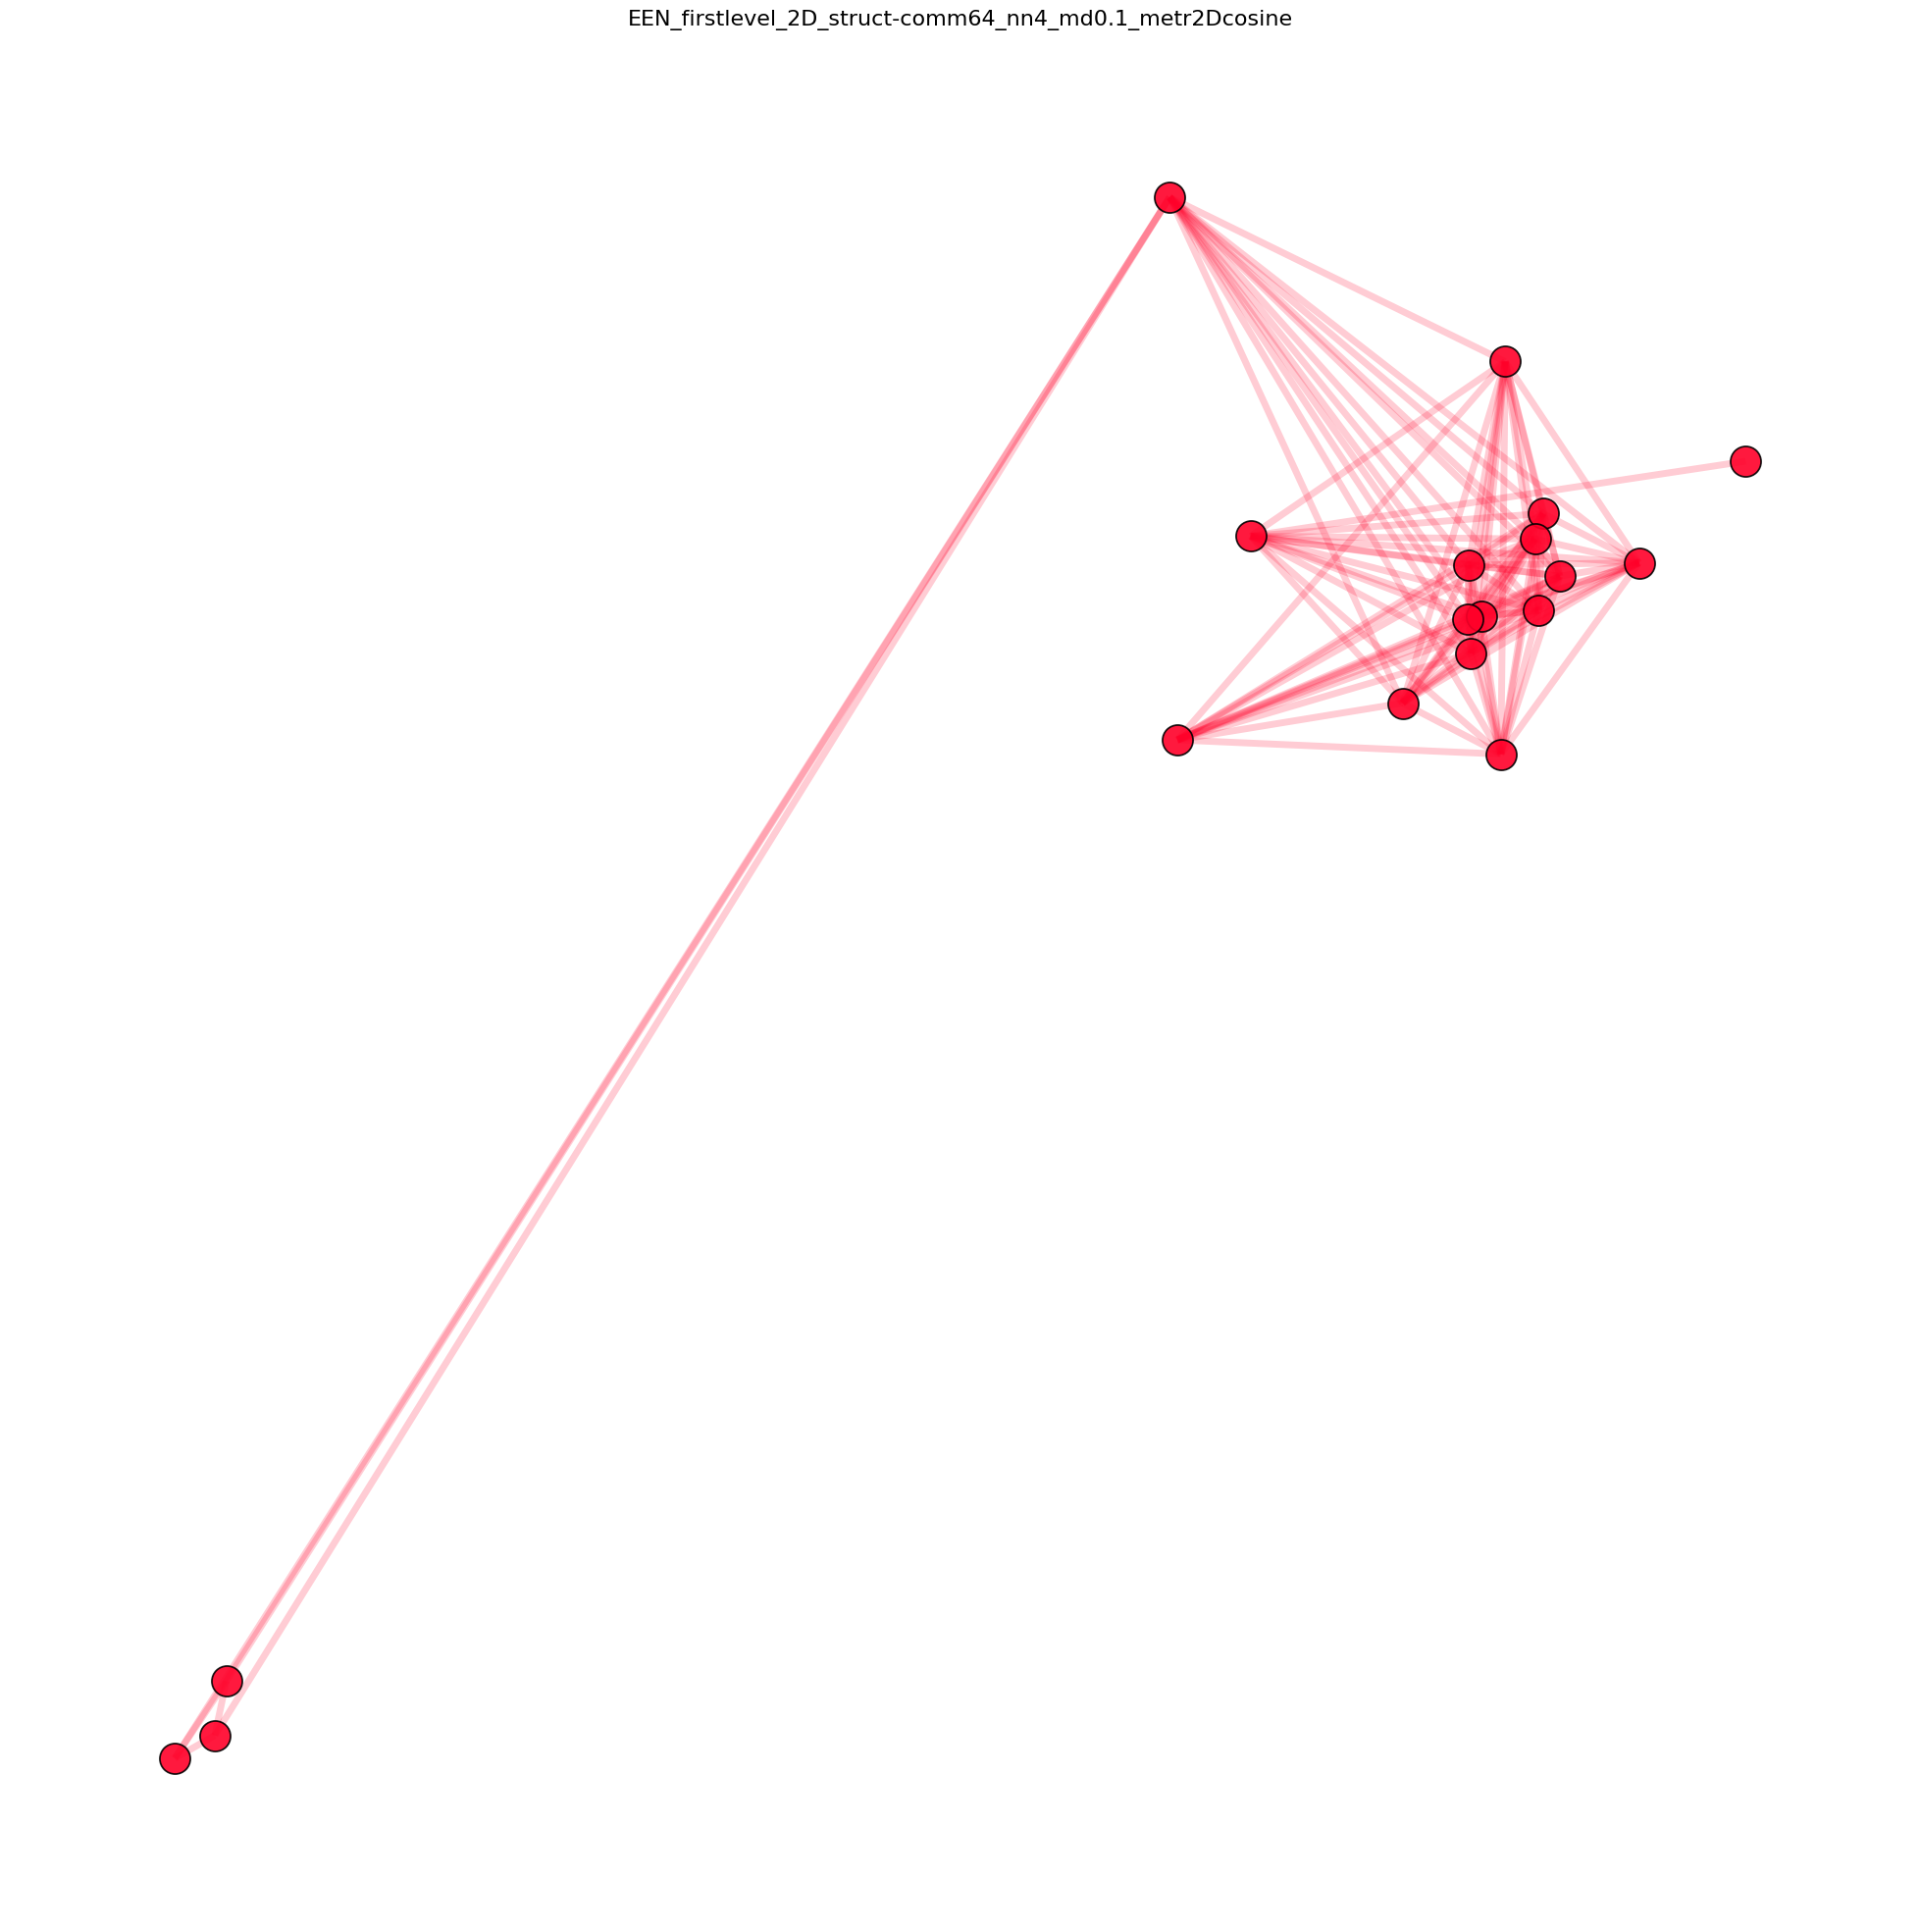

In [54]:
layoutname = 'firstlevel'

##########################################################
spec_comm_first = 64 #Salvo's selection 1_66
##########################################################

sublist_first = []
for k,v in d_comm_first.items():
    if v == spec_comm_first:
        sublist_first.append(k)

d_selectedcommunity_firstlevel = {spec_comm_first:sublist_first}
print("Number of exposures in community:" , len(*d_selectedcommunity_firstlevel.values()))
###########################################################

# get all subgraphs of all communities : 
nodes_subcommunities = []
subgraphs_subcommunities = []

for number_of_community in range(min(d_comm_first.values()),max(d_comm_first.values())):
    nodes_comm = []
    for node, comm in d_comm_first.items(): 
        if comm == number_of_community-1:
            nodes_comm.append(node)
            G_comm = G.subgraph(nodes_comm)

    nodes_subcommunities.append(nodes_comm)
    subgraphs_subcommunities.append(G_comm)
    
G_sub_first = subgraphs_subcommunities[spec_comm_first]
print("Specific Graph:" , G_sub_first)


########################################
# LAYOUT 
########################################

layout_method = 'struct-comm'+str(spec_comm_first) 

r = 0.9
alpha = 1.0

A_sub = nx.adjacency_matrix(G_sub_first, nodelist=list(G_sub_first.nodes()))
DM_m_sub = rnd_walk_matrix2(A_sub, r, alpha, len(G_sub_first.nodes()))
FM_structural_sub = pd.DataFrame(DM_m_sub)
FM_structural_sub.sum(axis=1) # axis=1 for columns i.e. features = sum 1
FM_structural_sub.index=list(G_sub_first.nodes())
FM_structural_sub.columns=list(G_sub_first.nodes())

n_n = 4
spr = 1.0
md = 0.1
metr2D = 'cosine'
posG2D_first = layout_portrait_umap(G_sub_first,
                                   FM_structural_sub, #FM_communities_sub, #df_posG,
                                   2,
                                   n_neighbors=n_n, 
                                   spread=spr, 
                                   min_dist=md, 
                                   metric=metr2D
                                  )

print('Number of Nodes: (to match G_sub_first nodes): ', len(posG2D_first))

########################################
# COLORS 
########################################

d_comm_first_selected = {}
for node in G_sub_first.nodes():
    d_comm_first_selected[node] = d_comm_first[node]
print("communities of second level in third level community selected: ", set(d_comm_first_selected.values()))

set_communities = set(d_comm_first_selected.values())

# get unique color for each community 
colorlist_fin_rgb = sns.color_palette("gist_rainbow", n_colors = len(set_communities))
colorlist_fin = [mcolors.to_hex(rgb) for rgb in colorlist_fin_rgb]
#random.shuffle(colorlist_fin)
print("number of unique colors:" ,len(set(colorlist_fin)))

# assign previously assigned color (to remain same)
d_comm_col_new = {spec_comm_first:d_comm_col[1]} # dict(zip(set_communities , colorlist_fin))

opacity_nodes = 0.9
node_edge_col = '#000000' 
node_linewidth = 0.25
edge_opacity = 0.25
edge_width = 0.1
edge_color = '#A1A1A1'


#########################################
# subsets according to sublevel communities 
########################################

# get all subgraphs of all communities : 
nodes_allcommunities_firstlevel = []
subgraphs_allcommunities_firstlevel = []

for number_of_community in list(set_communities):
    nodes_comm = []
    for node, comm in d_comm_first.items(): 
        if comm == number_of_community:
            nodes_comm.append(node)
            G_comm = G_sub_third.subgraph(nodes_comm)

    nodes_allcommunities_firstlevel.append(nodes_comm)
    subgraphs_allcommunities_firstlevel.append(G_comm)
print("Number of subgraphs:", len(subgraphs_allcommunities_firstlevel))
print("Number of second level communities: ", len(nodes_allcommunities_firstlevel))

# get sub of positions according to communities in more detailed level 
pos2D_allcommunities_firstlevel = []

for n_l in nodes_allcommunities_firstlevel:
    posG2D_comm = {}
    for n in n_l:
    # get positions from community nodes
        posG2D_comm[n] = posG2D_third[n]
    pos2D_allcommunities_firstlevel.append(posG2D_comm)
print("Number of position-sublists:", len(pos2D_allcommunities_firstlevel))

colors_allcommunities_firstlevel = []

for idx,number_of_community in enumerate(list(set_communities)):
    for i,n_comm in enumerate(nodes_allcommunities_firstlevel):
        # get color from community  
        for comm, col in d_comm_col_new.items():
            if comm == number_of_community:
                comm0_color = col
    colors_allcommunities_firstlevel.append(comm0_color)

print("Number of individual colors: ", len(set(colors_allcommunities_firstlevel)))


#######################################
# PLOT  
########################################

fname = 'EEN_'+layoutname+'_2D_'+layout_method+'_nn'+str(n_n)+'_md'+str(md)+'_metr2D'+metr2D
plt.figure(figsize=(25,25))
plt.title(fname, size=16)

# draw network edges all (very transparent)
#nx.draw_networkx_edges(G_sub_third, posG2D_third, width = 1, edge_color = '#6C6C6C', alpha = 0.1)


# draw network edges within communities 
for i in range(len(set_communities)):
    nx.draw_networkx_nodes(subgraphs_allcommunities_firstlevel[i],
                            pos2D_allcommunities_firstlevel[i], 
                            edgecolors = node_edge_col, 
                            linewidths = node_linewidth*5, 
                            node_color = colors_allcommunities_firstlevel[i], 
                            node_size = 500, alpha = opacity_nodes)
    nx.draw_networkx_edges(subgraphs_allcommunities_firstlevel[i],pos2D_allcommunities_firstlevel[i], width = 2.0*2.5, edge_color = colors_allcommunities_firstlevel[i], alpha = 0.2)

plt.box(False)

plt.savefig('output/Figures/SF18A_part4_v00.pdf',dpi=300)
plt.show()

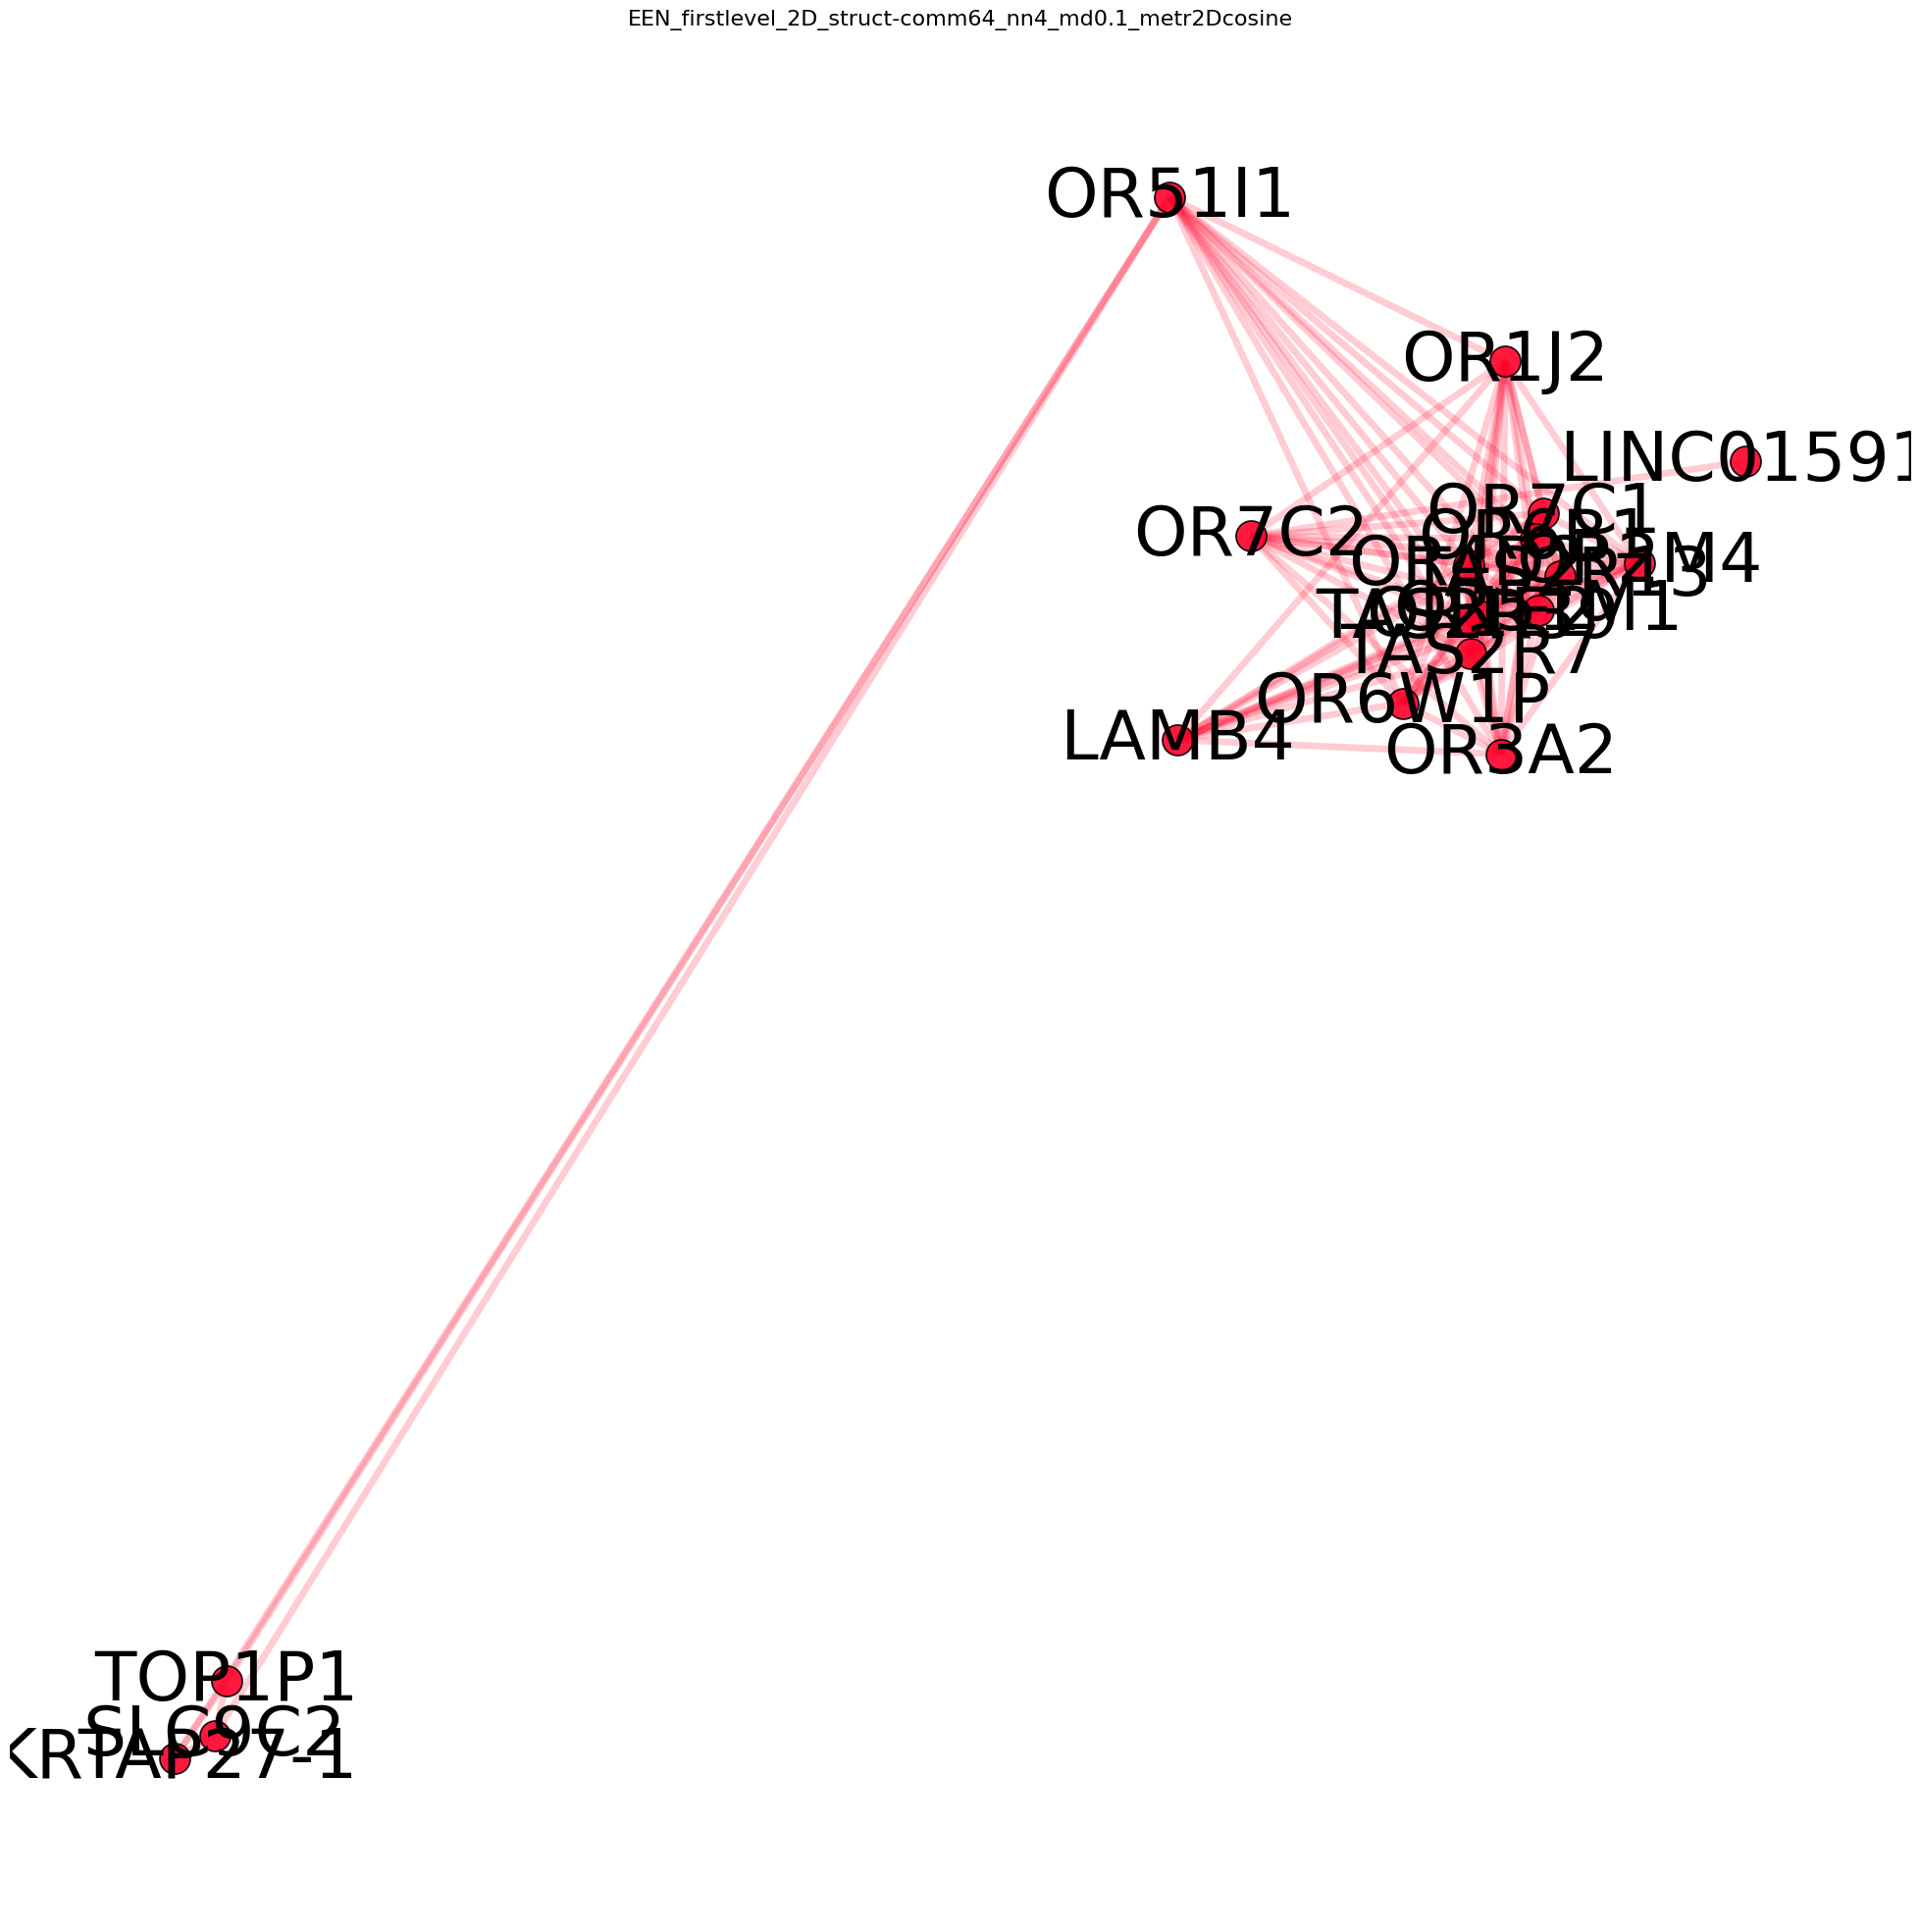

In [55]:
plt.figure(figsize=(25,25))
plt.title(fname, size=16)

# draw network edges all (very transparent)
#nx.draw_networkx_edges(G_sub_third, posG2D_third, width = 1, edge_color = '#6C6C6C', alpha = 0.1)


# draw network edges within communities 
for i in range(len(set_communities)):
    nx.draw_networkx_nodes(subgraphs_allcommunities_firstlevel[i],
                            pos2D_allcommunities_firstlevel[i], 
                            edgecolors = node_edge_col, 
                            linewidths = node_linewidth*5, 
                            node_color = colors_allcommunities_firstlevel[i], 
                            node_size = 500, alpha = opacity_nodes)
    nx.draw_networkx_edges(subgraphs_allcommunities_firstlevel[i],pos2D_allcommunities_firstlevel[i], width = 2.0*2.5, edge_color = colors_allcommunities_firstlevel[i], alpha = 0.2)
    nx.draw_networkx_labels(subgraphs_allcommunities_firstlevel[i], pos2D_allcommunities_firstlevel[i],  font_color = 'black',font_size=50)
plt.box(False)


plt.show()

In [56]:
fine_grained_communities_dict['1_66']

['OR51I1',
 'KRTAP27-1',
 'SLC9C2',
 'TOP1P1',
 'OR1E2',
 'OR1J2',
 'OR2M4',
 'OR3A2',
 'OR4D2',
 'OR51M1',
 'OR6B1',
 'OR6W1P',
 'OR7C1',
 'TAS2R13',
 'TAS2R39',
 'TAS2R7',
 'LAMB4',
 'OR7C2',
 'LINC01591']